PREDICTING CUSTOMER CHURN FOR VODAFONE
--------------------------------------

## 1. BUSINESS UNDERSTANDING
----------------------
Companies in the present business environment are always looking for ways to increase their profitability and revenue margins. Customer retention is an important area of focus for sector participants since it has an immediate influence on sustainability and long-term performance. Businesses are using the capabilities of machine learning to undertake churn analysis on their client base in order to accomplish this goal.

Objectives of the project
-------------------------


The objective of this project is to help a Vodafone telecommunications company use classification models to gain insight into their customer data, determine the lifetime value of each customer, pinpoint the major variables affecting customer churn rates, and create predictive models to ascertain whether a customer will leave or not.

## 2. DATA COLLECTION AND DATA PREPARATION

    2.1 DATA COLLECTION

Installations and Importing the necessary libraries

In [3]:
#Install pyodbc and python-dotenv
%pip install pyodbc  
%pip install python-dotenv

# warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
#Importing the necessary Libraries.
import pyodbc                    #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
#Dataloading and preparing libraries
import pandas as pd
import numpy as np
import os
import warnings 

#Vizualiation Libraries
import matplotlib.pyplot as plt
import re
import matplotlib.ticker as ticker
import seaborn as sns

#Modelling Libraries
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from imblearn.over_sampling import SMOTE
from collections import Counter
#Model Improvement
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint




warnings.filterwarnings('ignore')

Getting dataset 1 from DB and loading/previewing

In [5]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')
# Get the values for the credentials you set in the '.env' file
database=environment_variables.get("DATABASE")
server=environment_variables.get("SERVER")
username=environment_variables.get("USERNAME")
password=environment_variables.get("PASSWORD")


connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [1]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection=pyodbc.connect(connection_string)

NameError: name 'pyodbc' is not defined

In [ ]:
query="Select * from dbo.LP2_Telco_churn_first_3000"
data_1=pd.read_sql(query,connection)

In [ ]:
data_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


Dataset 1 has 21 columns whose dtypes is as follow *5 have bool dtype*, *2 have float64 dtype*, *1 int64* and *13 object dtypes*. the dataset also have 3000 rows(entries). We have *3 numerical columns* and *18 categorical columns*.

Getting dataset 2 and Dataset 3, loading/preview

In [ ]:
#reading the excel file
data_2 = pd.read_excel("Telco-churn-second-2000.xlsx")

In [ ]:
data_2.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15
5,0516-QREYC,Female,1,No,No,24,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.30,459.95
6,9685-WKZGT,Male,1,No,No,14,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.95,1036.75
7,6022-UGGSO,Female,1,No,No,32,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,2276.95
8,8084-OIVBS,Female,0,No,No,11,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.00,211.95
9,8896-BQTTI,Male,0,No,No,1,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,25.00,25


In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [ ]:
data_2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

Dataset 2 has 20 columns whose dtypes is as follow, *2 have float64 dtype*, *1 int64 dtype* and *17 object dtypes*. the dataset also have 1999 rows(entries). We have *3 numerical columns* and *17 categorical columns*.  Its missing the Churn Column. this mean its our dataset that will predict churn rate after creating our model.

getting dataset 3; loading and preview

In [ ]:
#reading the csv file
data_3 = pd.read_csv("LP2_Telco-churn-last-2000.csv")

In [ ]:
data_3.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No
5,2359-QWQUL,Female,0,Yes,No,39,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),104.70,4134.85,Yes
6,9103-TCIHJ,Female,0,No,No,15,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,55.70,899.8,Yes
7,7407-SUJIZ,Male,0,No,No,25,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.60,541.5,No
8,9150-KPBJQ,Female,0,No,No,6,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.65,116.85,No
9,0052-DCKON,Male,0,Yes,No,66,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),115.80,7942.15,No


In [ ]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [ ]:
data_3.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Dataset 3 has 21 columns whose dtypes is as follow, *1 have float64 dtype*, *2 int64* and *18 object dtypes*. the dataset also have 2043 rows(entries). We have *3 numerical columns* and *18 categorical columns*.

## HYPOTHESIS FORMULATION
Null Hypothesis (H0): There is no significant relationship between customer characteristics and churn rate in the telecommunication company's customer base.

Alternative Hypothesis (H1): There is a significant relationship between customer characteristics and churn rate in the telecommunication company's customer base.

## SMART BUSINESS QUESTIONS
## Univariate Analysis:
1. Does the average MonthlyCharges differ significantly between customers who churn and those who do not?
## Bivariate Analysis:
2. Does the customer's tenure with the company influence their likelihood of churning?
3. Is there a significant difference in churn rates between customers who have InternetService and those who do not?
4. How does the presence or absence of OnlineSecurity and OnlineBackup impact the probability of customer churn?
5. Are customers who have PaperlessBilling more likely to churn compared to those who receive paper bills?
6. Does the choice of PaymentMethod (e.g., electronic check, credit card, etc.) have any correlation with customer churn rates?
## Multivariate Analysis:
7. How does the interaction between contract status, monthly charges, and tenure the likelihood of customer churn?

## 2.2 DATA CLEANING

All Columns are important based on our smart questions are and will assist in our analysis.


### 2.2.1 Cleaning the data_1

In [ ]:
# checking the  data infor - 
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


Dataset 1 has 3000 rows an 21 rows. Some columns are showing as boolean, float, int and object datatype. Lets explore the datatypes.

In [ ]:
#check data 1 datatypes
data_1.dtypes.value_counts()

object     13
bool        5
float64     2
int64       1
Name: count, dtype: int64

There are 13 object dtype columns, 2 float dtype columns, 5 bools and one integer dtypes column.

In [ ]:
# Lets have a preview of entries in the dataset 1
data_1.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
5,9305-CDSKC,Female,False,False,False,8,True,True,Fiber optic,False,...,True,False,True,True,Month-to-month,True,Electronic check,99.650002,820.500000,True
6,1452-KIOVK,Male,False,False,True,22,True,True,Fiber optic,False,...,False,False,True,False,Month-to-month,True,Credit card (automatic),89.099998,1949.400024,False
7,6713-OKOMC,Female,False,False,False,10,False,None,DSL,True,...,False,False,False,False,Month-to-month,False,Mailed check,29.750000,301.899994,False
8,7892-POOKP,Female,False,True,False,28,True,True,Fiber optic,False,...,True,True,True,True,Month-to-month,True,Electronic check,104.800003,3046.050049,True
9,6388-TABGU,Male,False,False,True,62,True,False,DSL,True,...,False,False,False,False,One year,False,Bank transfer (automatic),56.150002,3487.949951,False


Replacing the bool rows with Yes or No where there is True and False respectively. The rows are: Partner, Dependents, PhoneService, PaperlessBilling, SeniorCitizen, MultipleLines, OnlineSecurity, DeviceProtection,TechSupport, StreamingTV, StreamingMovies and Churn

In [ ]:
# Dealing rows with boolean values
data_1['Partner'] = data_1['Partner'].replace({True: 'Yes', False: 'No'})
data_1['Dependents'] = data_1['Dependents'].replace({True: 'Yes', False: 'No'})
data_1['PhoneService'] = data_1['PhoneService'].replace({True: 'Yes', False: 'No'})
data_1['PaperlessBilling'] = data_1['PaperlessBilling'].replace({True: 'Yes', False: 'No'})
data_1['SeniorCitizen'] = data_1['SeniorCitizen'].replace({True: 'Yes', False: 'No'})
data_1['MultipleLines'] = data_1['MultipleLines'].replace({True: 'Yes', False: 'No'})
data_1['OnlineSecurity'] = data_1['OnlineSecurity'].replace({True: 'Yes', False: 'No'})
data_1['DeviceProtection'] = data_1['DeviceProtection'].replace({True: 'Yes', False: 'No'})
data_1['TechSupport'] = data_1['TechSupport'].replace({True: 'Yes', False: 'No'})
data_1['StreamingTV'] = data_1['StreamingTV'].replace({True: 'Yes', False: 'No'})
data_1['StreamingMovies'] = data_1['StreamingMovies'].replace({True: 'Yes', False: 'No'})
data_1['Churn'] = data_1['Churn'].replace({True: 'Yes', False: 'No'})
data_1['OnlineBackup'] = data_1['OnlineBackup'].replace({True: 'Yes', False: 'No'})

In [ ]:
#Lets check if the bool data type - false, true  has been handled.
data_1.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,None,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.650002,820.500000,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.099998,1949.400024,No
7,6713-OKOMC,Female,No,No,No,10,No,None,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.750000,301.899994,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.800003,3046.050049,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.150002,3487.949951,No


Now lets change datatypes for numerical to be floats and for categorical to object

In [ ]:
# Convert 'Total Charges' column to numeric datatype, replacing any non-numeric values.
data_1['TotalCharges'] = pd.to_numeric(data_1['TotalCharges'], errors='coerce')

# Convert Total Charges column from object to float datatype
data_1['TotalCharges'] = data_1['TotalCharges'].astype(float)
print(data_1['TotalCharges'].dtype)

float64


In [ ]:
# Convert tenure  columns from int. to float datatype
data_1['tenure'] = pd.to_numeric(data_1['tenure'], errors='coerce')
data_1['tenure'] = data_1['tenure'].astype(float)

print(data_1['tenure'].dtype)


float64


In [ ]:
#Lets check data types again
data_1.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
data_1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tenure,3000.0,32.527333,24.637768,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,3000.0,65.347400,30.137053,18.400000,35.787499,70.900002,90.262501,118.650002
TotalCharges,2995.0,2301.278315,2274.987884,18.799999,415.250000,1404.650024,3868.725098,8564.750000


I. Checking for Duplicates and Remove

In [ ]:
duplicates = data_1.duplicated(keep=False)

# Returns the total number of duplicates
duplicates_count = duplicates.value_counts()
duplicates_count

False    3000
Name: count, dtype: int64

Dataset 1 has no duplicates. Lets proceed with the missing values

II. Checking the MIssing values

In [ ]:
data_1_missing = data_1.isnull().sum()
data_1_missing

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

The above codes shows that there are the missing values. the columns with highest missing values of 651 are OnlineSecurity,Online Backup,DeviceProtection, Techsupport.StreeamingTV and StreamingMovies. Lets calculate percentages of missing values to be able to see how to fill them

In [ ]:
#Compute missing percentage o
missing_count = data_1['OnlineSecurity'].isnull().sum()
total_rows = data_1.shape[0]

missing_percentage = (missing_count / total_rows) * 100

print(f"Percentage of missing values in {'OnlineSecurity'}: {missing_percentage:.2f}%")

Percentage of missing values in OnlineSecurity: 21.70%


The highest columns with missing values has a 21% of the total rows. Cleaning up the missing values by filling categorical columns with 'Unknown' and numberical with median value.

In [ ]:
# filling cat-columns with 'Unknown'
column_names = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column_name in column_names:
    data_1[column_name].fillna('Unknown', inplace=True)

In [ ]:
#fill in churn column missing value with mode value
# Calculate the mode of the 'Churn' column
mode_churn = data_1['Churn'].mode()[0]

# Fill missing values with the mode value
data_1['Churn'].fillna(mode_churn, inplace=True)

In [ ]:
# Filling Num-cols with median value - TotalCharges
# Calculate the mean of charge
median_charge_data1= data_1['TotalCharges'].median()

# Replace NaN values with median value
data_1['TotalCharges'].fillna(median_charge_data1, inplace=True)

Lets check if the missing values has been handled.

In [ ]:
#check missing values has been filled
data_1.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

All missing values has been handled lets rename columns 

In [ ]:
# Renaming the columns to start with a capital letter
data_1.rename(columns={'gender': 'Gender', 'tenure': 'Tenure', 'customerID': 'CustomerID'}, inplace=True)

The Final Cleaned DATASET1 

In [ ]:
data_1.head(10)

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1.0,No,Unknown,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45.0,No,Unknown,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
5,9305-CDSKC,Female,No,No,No,8.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.650002,820.500000,Yes
6,1452-KIOVK,Male,No,No,Yes,22.0,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.099998,1949.400024,No
7,6713-OKOMC,Female,No,No,No,10.0,No,Unknown,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.750000,301.899994,No
8,7892-POOKP,Female,No,Yes,No,28.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.800003,3046.050049,Yes
9,6388-TABGU,Male,No,No,Yes,62.0,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.150002,3487.949951,No


The cleaned version of DATASET 1 has 3 numerical columns and 18 categorical columns.

### 2.2.2 Cleaning data_2

In [ ]:
# checking the  data infor - 
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


Dataset 2 has 2000 rows an 20 rows. Some columns are showing as  float, int and object datatypes. Lets explore the datatypes.

In [ ]:
#check data 1 datatypes
data_2.dtypes.value_counts()

object     17
int64       2
float64     1
Name: count, dtype: int64

In [ ]:
# Lets have a preview of entries in the dataset 1
data_2.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15
5,0516-QREYC,Female,1,No,No,24,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.30,459.95
6,9685-WKZGT,Male,1,No,No,14,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.95,1036.75
7,6022-UGGSO,Female,1,No,No,32,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,2276.95
8,8084-OIVBS,Female,0,No,No,11,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.00,211.95
9,8896-BQTTI,Male,0,No,No,1,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,25.00,25


Lets change numerical columns(Total Charges,Monthly Charge and Tenure) to show float dtype and categorical columns(the rest of columns) to show object dtypes

In [ ]:
# Convert 'Total Charges' column to numeric datatype, replacing any non-numeric values.
data_2['TotalCharges'] = pd.to_numeric(data_2['TotalCharges'], errors='coerce')

# Convert Total Charges column from object to float datatype
data_2['TotalCharges'] = data_2['TotalCharges'].astype(float)
print(data_2['TotalCharges'].dtype)

float64


In [ ]:
# Convert tenure  columns from int. to float datatype
data_2['tenure'] = pd.to_numeric(data_2['tenure'], errors='coerce')
data_2['tenure'] = data_2['tenure'].astype(float)

print(data_2['tenure'].dtype)

float64


Lets convert SeniorCitizen from binary(0,1) to NO or YES respectively

In [ ]:
#Lets replace SeniorCitizen entries from binary ,0,1 to NO or YES respectively
data_2['SeniorCitizen'] = data_2['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})
data_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,No,No,No,12.0,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,No,No,No,9.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80
2,9513-DXHDA,Male,No,No,No,27.0,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,No,No,Yes,27.0,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,No,Yes,Yes,1.0,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [ ]:
#lets check DTYPES again
data_2.dtypes.value_counts()

object     17
float64     3
Name: count, dtype: int64

The SeniorCitizen Column has been converted to Object and entries changed to NO and YES, and numerical columns data types changed to floats. Lets deal with missing values and/or duplicates

I. Check for duplicated and remove them

In [ ]:
# Check for duplicates
duplicates_data_2 = data_2.duplicated(keep=False)

# Returns the total number of duplicates
duplicates_count = duplicates_data_2.value_counts()
duplicates_count

False    2000
Name: count, dtype: int64

There are no duplicates to be handled in dataset 2.

II. Check for missing Values and handle them accordingly.

In [ ]:
#checking null/missing values
missing_values_data_2 = data_2.isnull().sum()
missing_values_data_2

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64

We have missing Values only in the Total Charges columns. Lets fill them with median value

In [ ]:
#Fill missing values with median value for total charges columns
# Calculate the mean of charge
median_charge = data_2['TotalCharges'].median()

# Replace NaN values with median value
data_2['TotalCharges'].fillna(median_charge, inplace=True)

In [ ]:
#check if missing Values in dataset 2 has been resolved
data_2.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

The missing Values has been handled.now lets rename columns gender, tenure and customer ID to start with a capital letter to match the rest of the columns

In [ ]:
# Renaming the columns to start with a capital letter
data_2.rename(columns={'gender': 'Gender', 'tenure': 'Tenure', 'customerID': 'CustomerID'}, inplace=True)

The FINAL Cleaned Dataset 2


In [ ]:
data_2.head(10)

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,No,No,No,12.0,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,No,No,No,9.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80
2,9513-DXHDA,Male,No,No,No,27.0,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,No,No,Yes,27.0,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,No,Yes,Yes,1.0,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15
5,0516-QREYC,Female,Yes,No,No,24.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.30,459.95
6,9685-WKZGT,Male,Yes,No,No,14.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.95,1036.75
7,6022-UGGSO,Female,Yes,No,No,32.0,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,2276.95
8,8084-OIVBS,Female,No,No,No,11.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.00,211.95
9,8896-BQTTI,Male,No,No,No,1.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,25.00,25.00


The cleaned version of DATASET 2 has 3 numerical columns and 17 categorical columns.

### 2.2.3 Cleaning data_3

In [ ]:
# checking the  data infor - 
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [ ]:
data_3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


I. Check for Duplicates and remove them

In [ ]:
# Check for duplicates
duplicates = data_3.duplicated(keep=False)

# Returns the total number of duplicates
duplicates_count = duplicates.value_counts()
duplicates_count

False    2043
Name: count, dtype: int64

In [ ]:
# Identifying the duplicate rows
duplicates = data_3[data_3.duplicated(keep=False)]
duplicates

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Our dataset 3 has no duplicates.

II. Checking for missing values

In [ ]:
missing_values_data_3 = data_3.isnull().sum()
missing_values_data_3

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### We can see that there are no missing values. But missing values can be represented using '-', let's check 

In [ ]:
# Replacing '-' with NaN
data_3.replace("—", np.nan, inplace=True)

# Check for missing values
missing_values_data_3 = data_3.isnull().sum()
missing_values_data_3

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

As you can see we have no missing values in dataset 3. lets do visual inspect categorical and numerical columns

In [ ]:
# lets do a statistical summary
data_3.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,2043,2043,5600-PDUJF,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,2043,2,Male,1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,2043.0,NaN,NaN,NaN,0.16838,0.374295,0.0,0.0,0.0,0.0,1.0
Partner,2043,2,No,1047,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,2043,2,No,1412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,2043.0,NaN,NaN,NaN,32.649046,24.376248,0.0,9.0,30.0,55.0,72.0
PhoneService,2043,2,Yes,1823,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,2043,3,No,987,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,2043,3,Fiber optic,905,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,2043,3,No,1029,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#lets inspect categorical columns
data_3.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Interpretation from the statistical description.
Most of the categorical columns has more than 2 unique values. For numerical columns some are displaying NAN unique values which could be caused by dtype of the columns lets inspect further the columns as below.
lets inspect categorical columns/numerical columns seperately to check missing values represented as None/NAN.

In [ ]:
#lets inspect categorical columns with more than 2 unique values - online security,internet service,onlineback,
data_3['OnlineSecurity'].value_counts(ascending=False)

OnlineSecurity
No                     1029
Yes                     585
No internet service     429
Name: count, dtype: int64

In [ ]:
data_3['InternetService'].value_counts(ascending=False)

InternetService
Fiber optic    905
DSL            709
No             429
Name: count, dtype: int64

In [ ]:
data_3['OnlineBackup'].value_counts(ascending=False)

OnlineBackup
No                     911
Yes                    703
No internet service    429
Name: count, dtype: int64

In [ ]:
data_3['PaymentMethod'].value_counts(ascending=False)

PaymentMethod
Electronic check             696
Mailed check                 476
Bank transfer (automatic)    438
Credit card (automatic)      433
Name: count, dtype: int64

All categorical columns has uniques values that cannot be assumed as missing. lets explore the dtype of all numerical columns and now check missing values again.

In [ ]:
#lets explore the numerical columns
print(data_3['TotalCharges'].dtype)

object


In [ ]:
print(data_3['tenure'].dtype)

int64


In [ ]:
print(data_3['MonthlyCharges'].dtype)

float64


In [ ]:
print(data_3['SeniorCitizen'].dtype)

int64


the numerical column total charges, is in object dataframe lets change to floats. Also change dtype to floats SeniorCitizen & tenure columns and check if there missing values. also Tenure column to float dtype

In [ ]:
# Convert 'Total Charges' column to numeric datatype, replacing any non-numeric values.
data_3['TotalCharges'] = pd.to_numeric(data_3['TotalCharges'], errors='coerce')

# Convert Total Charges column from object to float datatype
data_3['TotalCharges'] = data_3['TotalCharges'].astype(float)
print(data_3['TotalCharges'].dtype)

float64


In [ ]:
# Convert Total Charges and Senior Citizen columns from int. to float datatype
data_3['tenure'] = data_3['tenure'].astype(float)
print(data_3['tenure'].dtype)

float64


Lets convert SeniorCitizen from binary(0,1) to NO or YES respectively

In [ ]:
#Lets replace SeniorCitizen entries from binary ,0,1 to NO or YES respectively
data_3['SeniorCitizen'] = data_3['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

In [ ]:
#lets check again dtypes
data_3.dtypes.value_counts()

object     18
float64     3
Name: count, dtype: int64

We have 18 object columns i.e Categorical cols and 3 numerical columns with dtype as float

In [ ]:
## Lets check for missing values again
data_3.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
Churn               0
dtype: int64

In [ ]:
#check unique Values
data_3['TotalCharges'].value_counts(ascending=False)

TotalCharges
20.20      5
19.65      4
19.90      4
69.65      4
70.30      3
          ..
35.00      1
2106.30    1
20.85      1
649.65     1
6844.50    1
Name: count, Length: 1990, dtype: int64

Now we have missing values on Total Charges Column: Lets fill the missing values  with  median value.

In [ ]:
#Fill missing values with median value for total charges columns
# Calculate the mean of charge
median_charge = data_3['TotalCharges'].median()

# Replace NaN values with median value
data_3['TotalCharges'].fillna(median_charge, inplace=True)
data_3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,No,No,No,6.0,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,No,No,No,19.0,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,No,Yes,Yes,69.0,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,No,Yes,Yes,11.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,No,Yes,No,64.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [ ]:
#confirm missing values has been resolved
data_3.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The missing values has been handled. now lets rename columns gender, tenure and customer ID to start with a capital letter to match the rest of the columns

In [ ]:
# Renaming the columns to start with a capital letter
data_3.rename(columns={'gender': 'Gender', 'tenure': 'Tenure', 'customerID': 'CustomerID'}, inplace=True)

#### Final Cleaned Dataset 3

In [ ]:
data_3.head(10)

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,No,No,No,6.0,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.70,No
1,8292-TYSPY,Male,No,No,No,19.0,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.50,Yes
2,0567-XRHCU,Female,No,Yes,Yes,69.0,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.10,No
3,1867-BDVFH,Male,No,Yes,Yes,11.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.20,Yes
4,2067-QYTCF,Female,No,Yes,No,64.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.40,No
5,2359-QWQUL,Female,No,Yes,No,39.0,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),104.70,4134.85,Yes
6,9103-TCIHJ,Female,No,No,No,15.0,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,55.70,899.80,Yes
7,7407-SUJIZ,Male,No,No,No,25.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.60,541.50,No
8,9150-KPBJQ,Female,No,No,No,6.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.65,116.85,No
9,0052-DCKON,Male,No,Yes,No,66.0,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),115.80,7942.15,No


In [ ]:
data_3.dtypes

CustomerID           object
Gender               object
SeniorCitizen        object
Partner              object
Dependents           object
Tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

The cleaned version of DATASET 3 has 3 numerical columns and 18 categorical columns.

#### 2.2.4 DATA CONCATENATION
Combining the 2 datatsets to one dataset for data analysis using SMART questions.
Here we are going to **use DATASET 1 and DATASET 3** since they are our training dataset which will be used in designing our model.  They both have the **Churn Column**

In [ ]:
#Concatnate our dataset.
# Create a list of the datasets
datasets = [data_1, data_3]

# Concatenate the datasets vertically
final_data = pd.concat(datasets, ignore_index=True)

In [ ]:
#A preview of the data
final_data.head(10)

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1.0,No,Unknown,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45.0,No,Unknown,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
5,9305-CDSKC,Female,No,No,No,8.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.650002,820.500000,Yes
6,1452-KIOVK,Male,No,No,Yes,22.0,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.099998,1949.400024,No
7,6713-OKOMC,Female,No,No,No,10.0,No,Unknown,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.750000,301.899994,No
8,7892-POOKP,Female,No,Yes,No,28.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.800003,3046.050049,Yes
9,6388-TABGU,Male,No,No,Yes,62.0,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.150002,3487.949951,No


In [ ]:
#let check for missing values
final_data.isna().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# Checking for duplicates.
duplicates_final = final_data[final_data.duplicated(keep=False)]
duplicates_final

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


There no duplicates or missing values in the concated dataset. lets check unique values

In [ ]:
# Iterate through columns and show unique values for each column
for column in final_data.columns:
    unique_values = final_data[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in CustomerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in Gender: ['Female' 'Male']
Unique values in SeniorCitizen: ['No' 'Yes']
Unique values in Partner: ['Yes' 'No']
Unique values in Dependents: ['No' 'Yes']
Unique values in Tenure: [ 1. 34.  2. 45.  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 12. 30. 47. 72. 17. 27.  5. 46. 11. 70. 63. 43. 15. 60. 18. 66.  9.  3.
 31. 50. 64. 56.  7. 42. 35. 48. 29. 65. 38. 68. 32. 55. 37. 36. 41.  6.
  4. 33. 67. 23. 57. 61. 14. 20. 53. 40. 59. 24. 44. 19. 54. 51. 26.  0.
 39.]
Unique values in PhoneService: ['No' 'Yes']
Unique values in MultipleLines: ['Unknown' 'No' 'Yes' 'No phone service']
Unique values in InternetService: ['DSL' 'Fiber optic' 'No']
Unique values in OnlineSecurity: ['No' 'Yes' 'Unknown' 'No internet service']
Unique values in OnlineBackup: ['Yes' 'No' 'Unknown' 'No internet service']
Unique values in DeviceProtection: ['No' 'Yes' 'Unknown' 'No 

## GENERATE THE EXCEL DATA/CSV file to be used in POWERBI Deployment

In [ ]:
# convert file to csv_file
#final_data.to_csv(r'C:\\train data.csv', index=False)

print("csv file generated successfully.")

csv file generated successfully.


# 2.3 DATA ANALYSIS WITH SMART QUESTIONS

## UNIVARIATE ANALYSIS
**Question 1: "Does the average MonthlyCharges differ significantly between customers who churn and those who do not?"** 

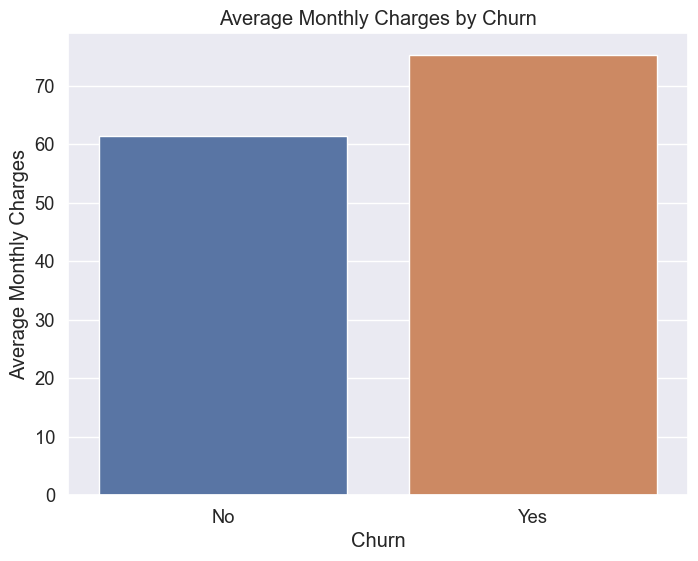

In [ ]:
# 'MonthlyCharges' and 'Churn' are the column names
# where 'MonthlyCharges' is the numeric column and 'Churn' is the object column with 'Yes' and 'No' values
# Create a bar plot to compare the average monthly charges for churn and no churn groups
plt.figure(figsize=(8, 6))
sns.barplot(x='Churn', y='MonthlyCharges', data=final_data, ci=None)
plt.title("Average Monthly Charges by Churn")
plt.xlabel("Churn")
plt.ylabel("Average Monthly Charges")
plt.xticks([0, 1], ['No', 'Yes'])  # Label x-axis with 'No' and 'Yes'
plt.show()

The bar plot illustrates the relationship between customer churn and their average monthly charges. We observe that as the monthly charges increase, there is a noticeable trend indicating a higher likelihood of churn. Specifically, customers with higher average monthly charges are more likely to churn compared to those with lower charges.

### BIVARATE ANALYSIS
Bivariate analysis involves the analysis of the relationship between two variables, examining how they interact or correlate with each other.

**Question 2: Does the customer's tenure with the company influence their likelihood of churning?**

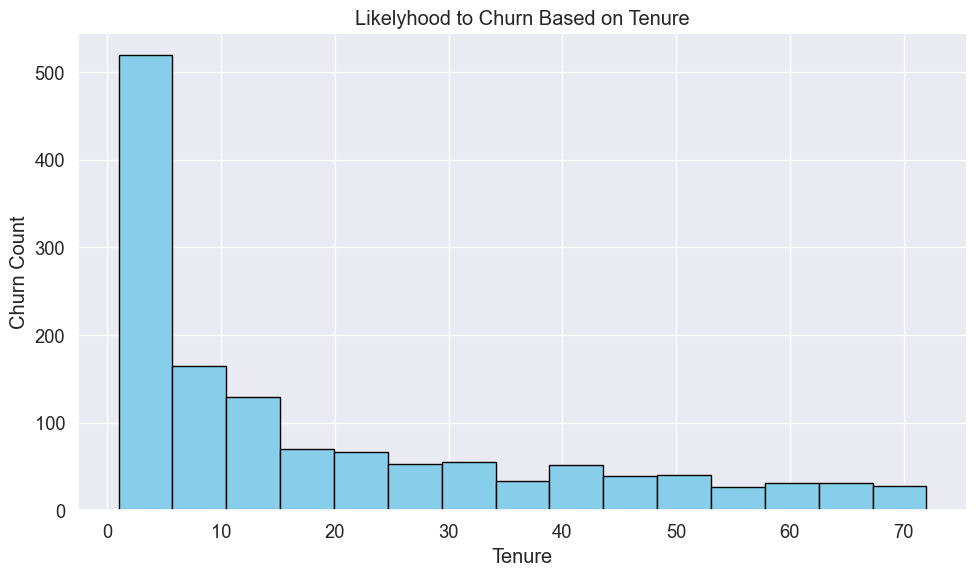

In [ ]:
# Filter data for churned customers
churned_data = final_data[final_data['Churn'] == 'Yes']

# Create a histogram to visualize churn count based on tenure
plt.figure(figsize=(10, 6))
plt.hist(churned_data['Tenure'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel('Tenure')
plt.ylabel('Churn Count')
plt.title("Likelyhood to Churn Based on Tenure")
plt.tight_layout()
plt.show()

Based on the histogram visualization, it appears that newer customers (lower tenure values) tend to have a higher churn rate compared to customers who have been with the company for a longer period (higher tenure values). This suggests that there might be a correlation between the length of time a customer has been with the company (tenure) and their likelihood of churning.

**Question 3 - Is there a significant difference in churn rates between customers who have InternetService and those who do not?**

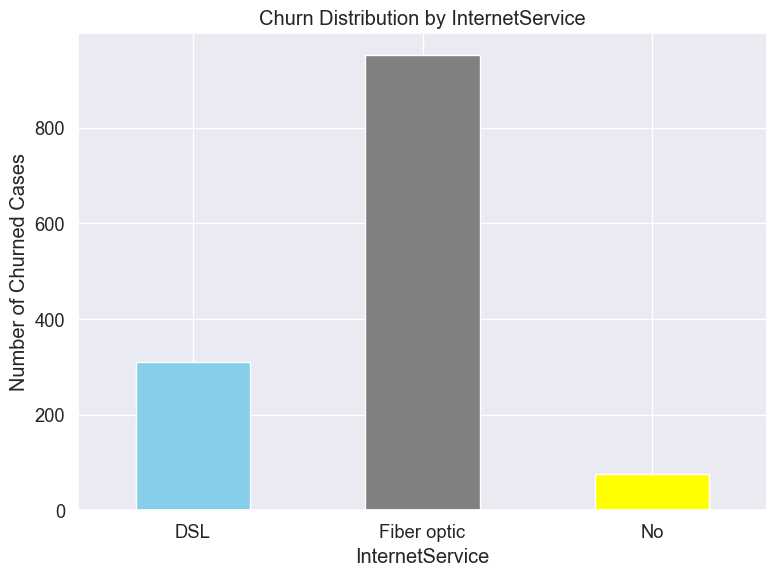

In [ ]:
# 'Churn' and 'InternetService' are the column names
# where 'Churn' is the object column with 'Yes' and 'No' values, and 'InternetService' is the categorical column

# Filter the data for churned cases (Churn == 'Yes')
churned_data = final_data[final_data['Churn'] == 'Yes']

# Group by 'InternetService' and calculate the count of churned cases
churn_distribution_by_internet = churned_data.groupby('InternetService').size()
# Define colors for the bar plot
colors = ['skyblue', 'gray', 'yellow']

# Create a bar plot to visualize churn distribution by InternetService
plt.figure(figsize=(8, 6))
churn_distribution_by_internet.plot(kind='bar', color= colors)
plt.ylabel('Number of Churned Cases')
plt.title("Churn Distribution by InternetService")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The bar plot you created earlier shows the distribution of churned cases (Churn == 'Yes') among different categories in the 'InternetService' column. From the plot, we can observe the following:

**Fiber Optic** has the highest number of churned cases among the different Internet service providers. This indicates a relatively higher churn rate for customers who have opted for fiber optic internet service.

**The DSL service provider** has the second-highest number of churned cases. While the churn rate is lower compared to fiber optic, it is still higher than the "No" category.

**No Internet category**, which represents customers without any internet service, has the lowest number of churned cases. This indicates that customers without internet service are less likely to churn.

In summary, based on the distribution of churned cases among different Internet service providers, it appears that customers who have opted for fiber optic internet service have the highest churn rate, followed by DSL, while customers without internet service have the lowest churn rate.

**Question 4 -How does the presence or absence of OnlineSecurity and OnlineBackup impact the probability of customer churn?**

Churned Data comparison with online back and security

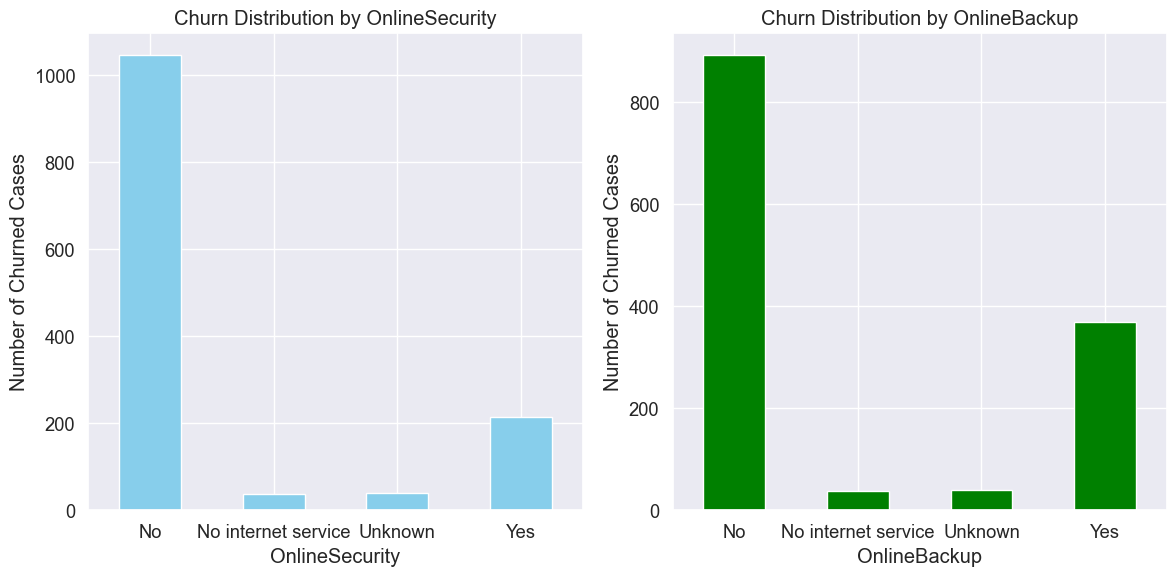

In [ ]:
# Filter the data for churned cases (Churn == 'Yes')
churned_data = final_data[final_data['Churn'] == 'Yes']

# Group by 'OnlineSecurity' and calculate the count of churned cases
churn_distribution_by_security = churned_data.groupby('OnlineSecurity').size()

# Group by 'OnlineBackup' and calculate the count of churned cases
churn_distribution_by_backup = churned_data.groupby('OnlineBackup').size()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot for OnlineSecurity
churn_distribution_by_security.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_ylabel('Number of Churned Cases')
axes[0].set_title("Churn Distribution by OnlineSecurity")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Bar plot for OnlineBackup
churn_distribution_by_backup.plot(kind='bar', color='green', ax=axes[1])
axes[1].set_ylabel('Number of Churned Cases')
axes[1].set_title("Churn Distribution by OnlineBackup")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

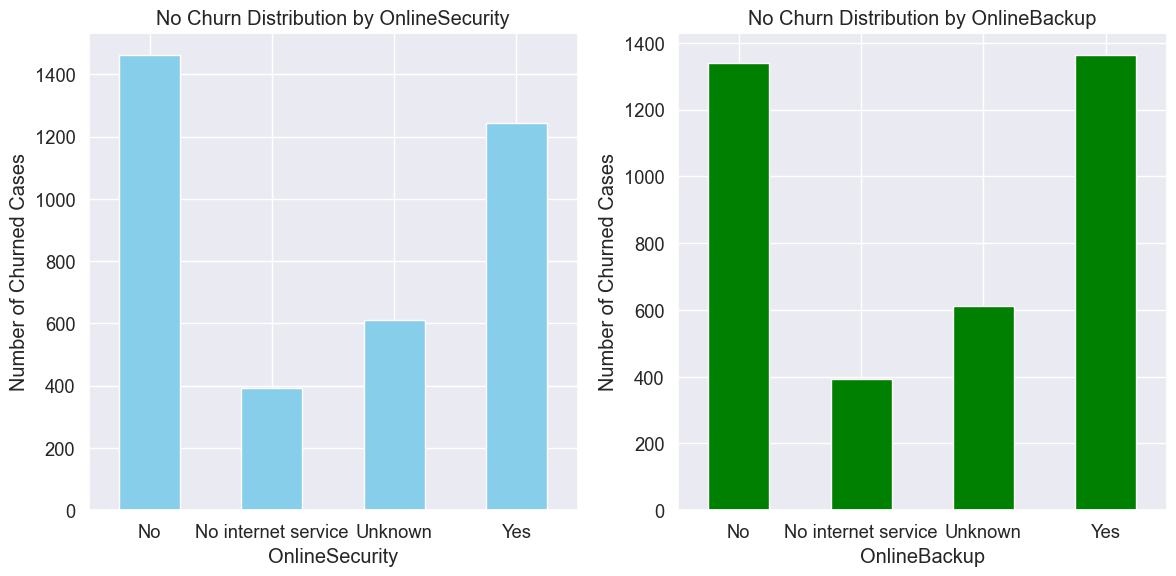

In [ ]:
# Filter the data for churned cases (Churn == 'Yes')
no_churn = final_data[final_data['Churn'] == 'No']

# Group by 'OnlineSecurity' and calculate the count of churned cases
churn_distribution_by_security = no_churn.groupby('OnlineSecurity').size()

# Group by 'OnlineBackup' and calculate the count of churned cases
churn_distribution_by_backup = no_churn.groupby('OnlineBackup').size()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot for OnlineSecurity
churn_distribution_by_security.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_ylabel('Number of Churned Cases')
axes[0].set_title("No Churn Distribution by OnlineSecurity")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Bar plot for OnlineBackup
churn_distribution_by_backup.plot(kind='bar', color='green', ax=axes[1])
axes[1].set_ylabel('Number of Churned Cases')
axes[1].set_title("No Churn Distribution by OnlineBackup")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

Churn Rate  by OnlineBackup:
The churn rate is higher when customers do not have online backup services compared to when they do.
Moreover, the churn count, which represents the actual number of customers churning, is significantly higher when there is no online backup service. This suggests that customers without online backup services are more likely to churn.

Churn Rate by OnlineSecurity:
Similar to the OnlineBackup scenario, the churn rate is higher for customers who do not have online security services.
Correspondingly, the churn count is notably higher when there is no online security. This reinforces the observation that customers without online security services exhibit a higher tendency to churn.

**Question 5 - Are customers who have PaperlessBilling more likely to churn compared to those who receive paper bills?**

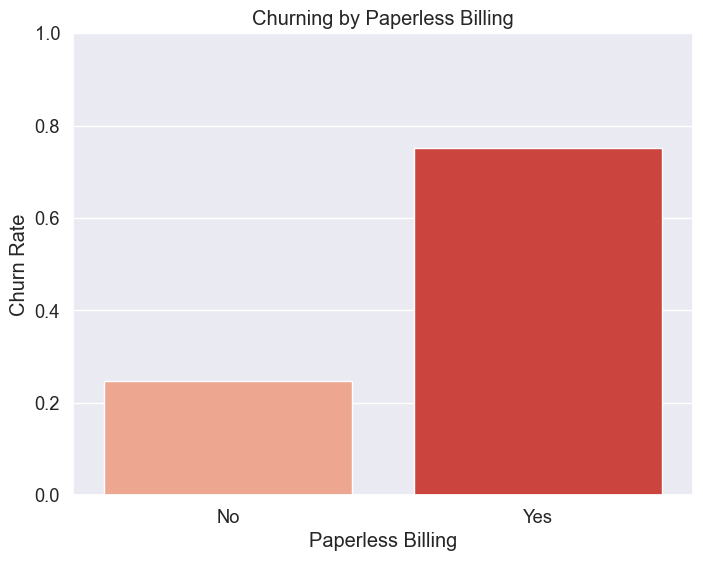

In [ ]:
# Filter the data for churned customers
churned_data = final_data[final_data['Churn'] == 'Yes']

# Calculate churn rate for PaperlessBilling
churn_rate_by_billing = churned_data.groupby('PaperlessBilling')['Churn'].count() / len(churned_data)

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_rate_by_billing.index, y=churn_rate_by_billing.values, palette="Reds")
plt.title("Churning by Paperless Billing")
plt.xlabel("Paperless Billing")
plt.ylabel("Churn Rate")
plt.ylim(0, 1)  # Set y-axis limit for better visualization
plt.show()

Customers who have opted for PaperlessBilling appear to have a higher likelihood of churning compared to those who receive paper bills. The bar plot clearly shows that the churn rate is noticeably higher for customers with PaperlessBilling. This suggests that customers who have chosen to receive their bills electronically, without the use of paper, are more inclined to churn as opposed to those who continue to receive traditional paper bills. This observation could indicate that the method of billing communication may play a role in influencing customer retention

**Question 6 - "Does the choice of PaymentMethod (e.g., electronic check, credit card, etc.) have any correlation with customer churn rates**

<Figure size 1000x600 with 0 Axes>

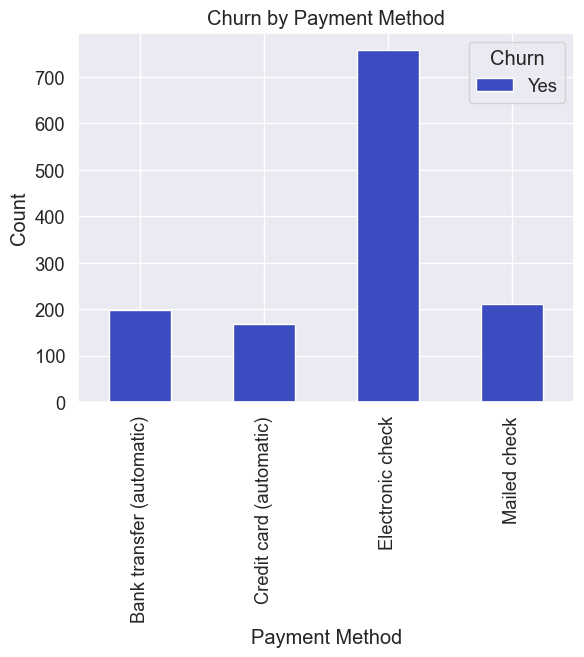

In [ ]:
# Filter the data for churned customers
churned_data = final_data[final_data['Churn'] == 'Yes']

# Create a cross-tabulation between PaymentMethod and churn
payment_churn_cross_tab = pd.crosstab(churned_data['PaymentMethod'], churned_data['Churn'])

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
payment_churn_cross_tab.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Churn by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=90)
#plt.legend(title='Churn')
plt.show()


The stacked bar chart clearly illustrates the impact of payment methods on customer churn. Among the various payment methods, "Electronic check" has the highest churning rate, with a notable number of customers churning. This suggests that customers who opt for electronic check as their payment method are more likely to churn compared to those who choose other payment methods.

### MULTIVARIATE ANALYSIS

**Question 7 -How does the interaction between contract status, monthly charges, and tenure the likelihood of customer churn?**

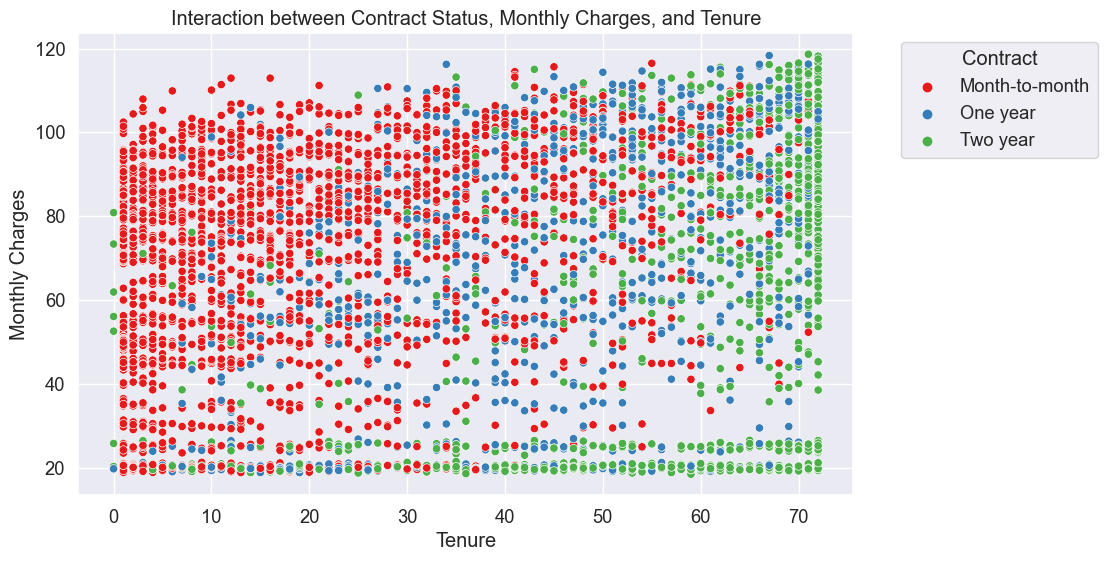

In [ ]:
# Create a scatter plot with color encoding for contract status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tenure', y='MonthlyCharges', data=final_data, hue='Contract', palette='Set1')
plt.title("Interaction between Contract Status, Monthly Charges, and Tenure")
plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")
# Move the legend outside of the chart
plt.legend(title='Contract', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The scatter plot illustrates a compelling relationship between contract type, monthly charges, and customer tenure in the company. It is evident that different contract types are associated with varying patterns of monthly charges and customer tenure.

Month-to-Month Contract (Blue Points): A substantial number of customers with month-to-month contracts are observed, especially among those with lower tenures. These customers tend to have a wide range of monthly charges, spanning from lower to higher values. This suggests that customers with shorter tenures may be exploring the service with a more flexible contract but might not be committing to higher monthly charges.

One-Year Contract (Orange Points): Customers with one-year contracts appear to be spread across a broader range of monthly charges. While there are customers with lower tenures who have opted for this contract type, there is a trend of slightly higher tenures being associated with slightly higher monthly charges.

Two-Year Contract (Green Points): The majority of customers with two-year contracts exhibit relatively higher tenures and are concentrated in a range of moderate to higher monthly charges. This indicates that customers with longer tenures are more likely to choose a two-year contract option, potentially in exchange for more stable or favorable monthly charges.

Overall, the plot implies that newer clients often opt for month-to-month contracts, possibly to evaluate the service, while older clients tend to prefer longer-term contracts, particularly two-year contracts, potentially indicating a higher level of commitment. The choice of contract type seems to correlate with both the desired monthly charges and the customer's tenure, suggesting a strategic alignment between contract flexibility, service evaluation, and long-term commitment.

In [ ]:
final_data.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1.0,No,Unknown,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45.0,No,Unknown,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


### 3. MODELLING

### 3.1 Feature Scaling and Feature Engineering
Here we are using Data Stored as dataframe - **Final Data** and **X_test**, to feature engineer(add a yearly charges column)
then once that is done, we encode the categorical columns and scale the numerical columns then do data splitting.

**Feature Engineering** 
here we creating a new feature yearly charges on both train data and X-test data

In [ ]:
#initialize combined data - final data, X test data
train_data = final_data
X_test = data_2
 

In [ ]:
#create a new feature YearlyCharges in each datasets
train_data['ChargesperYear'] = train_data['MonthlyCharges']*12
X_test['ChargesperYear'] = X_test['MonthlyCharges']*12

# Reorder the columns so that Churn Column to be the last one
columns = ['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
           'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
           'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
           'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'ChargesperYear',
           'Churn']

train_data = train_data.reindex(columns=columns)
print(train_data.columns)
print(X_test.columns)


Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'ChargesperYear',
       'Churn'],
      dtype='object')
Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'ChargesperYear'],
      dtype='object')


**Encoding the Categorical columns**
Here we are going to Encode the categorical columns on both train data and X_test as some Model Algorithms are sensitive to non numerical data, we are going to use **OneHotEncoder**

In [ ]:
#Selecting only numerical columns and setting a named variable for both Train data and X_test
num_train_data = train_data.select_dtypes(exclude="object")
num_X_test = X_test.select_dtypes(exclude="object")
num_train_data.head()

,Tenure,MonthlyCharges,TotalCharges,ChargesperYear
0,1.0,29.850000,29.850000,358.200005
1,34.0,56.950001,1889.500000,683.400009
2,2.0,53.849998,108.150002,646.199982
3,45.0,42.299999,1840.750000,507.599991
4,2.0,70.699997,151.649994,848.399963


In [ ]:
#Dealing will categorical columns  on the train and X-test Sets
cat_train_data = train_data.select_dtypes(include="object")
#lets drop customer ID columns on trainset
ct_train_data = cat_train_data.drop(columns=['CustomerID','Churn']) #= to match the columns in test data

#for Test data
cat_X_test = X_test.select_dtypes(include="object")
#lets drop customer ID columns on trainset
ct_X_test = cat_X_test.drop(columns=['CustomerID'])
ct_X_test.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

All columns categorized as categorical have been selected for both train data and Test set, omitting the Churn column as it not in the Xtest data

I. Encoding Categorical columns in train data

In [ ]:
#ENCODING CATEGORICAL VALUES
#Creating an instance of OneHotEncode
enc= OneHotEncoder()
# model to learn from Categorical X train data
enc.fit(ct_train_data)

OneHotEncoder()

In [ ]:
# Transform the Categorical train data
tct_train_data = pd.DataFrame(enc.transform(ct_train_data).toarray(), index=ct_train_data.index, columns=enc.get_feature_names_out(input_features=ct_train_data.columns))

# Transform the Categorical X_test data
tct_X_test = pd.DataFrame(enc.transform(ct_X_test).toarray(), index=ct_X_test.index, columns=enc.get_feature_names_out(input_features=ct_X_test.columns))

# Display the head of tct_train_data
tct_train_data.head(5)

,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


We going to combine the categorical data with numerical data then scale them all

In [ ]:
#Combining Categorical and number tranformed Xtrain and Xtest sets
comb_train_data= pd.merge(left=num_train_data,right=tct_train_data, how='outer',left_index =True,right_index=True)
comb_X_test= pd.merge(left=num_X_test,right=tct_X_test, how='outer',left_index =True,right_index=True)
comb_train_data.head()

,Tenure,MonthlyCharges,TotalCharges,ChargesperYear,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,29.850000,29.850000,358.200005,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,34.0,56.950001,1889.500000,683.400009,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2.0,53.849998,108.150002,646.199982,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,45.0,42.299999,1840.750000,507.599991,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,2.0,70.699997,151.649994,848.399963,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Feature Scalling
 by scaling them using **StandardScaler** we are going to scale the combined data train set and combined test set

In [ ]:
# Create StandardScaler instance
std = StandardScaler()

# Apply the scaler to the datasets
final_train_data = pd.DataFrame(std.fit_transform(comb_train_data), columns=comb_train_data.columns, index=comb_train_data.index)

# Use the same scaling parameters from the training data to scale the test data
final_X_test = pd.DataFrame(std.transform(comb_X_test), columns=comb_X_test.columns, index=comb_X_test.index)
final_X_test.head()

,Tenure,MonthlyCharges,TotalCharges,ChargesperYear,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.838926,0.643928,-0.547278,0.643928,-0.985237,0.985237,0.440332,-0.440332,0.975126,-0.975126,...,-0.804674,0.915329,-0.514338,-0.572236,-0.826586,0.826586,-0.535851,-0.525109,1.402309,-0.536771
1,-0.961238,-1.486446,-0.934338,-1.486446,-0.985237,0.985237,0.440332,-0.440332,0.975126,-0.975126,...,-0.804674,0.915329,-0.514338,-0.572236,1.209796,-1.209796,-0.535851,-0.525109,-0.713110,1.862993
2,-0.227364,0.552460,-0.038843,0.552460,-0.985237,0.985237,0.440332,-0.440332,0.975126,-0.975126,...,1.242739,-1.092503,1.944247,-0.572236,1.209796,-1.209796,-0.535851,-0.525109,1.402309,-0.536771
3,-0.227364,0.479285,-0.052954,0.479285,-0.985237,0.985237,0.440332,-0.440332,0.975126,-0.975126,...,-0.804674,0.915329,-0.514338,-0.572236,-0.826586,0.826586,-0.535851,-0.525109,1.402309,-0.536771
4,-1.287404,0.800255,-0.975193,0.800255,-0.985237,0.985237,0.440332,-0.440332,-1.025509,1.025509,...,1.242739,0.915329,-0.514338,-0.572236,1.209796,-1.209796,-0.535851,-0.525109,-0.713110,1.862993


We had removed Customer ID and Churn column in the Train Set data and Customer ID column in the X_test lets readd them now.

In [ ]:
# Add the "CustomerID" and "Churn" columns back to final_train_data
final_train_data["CustomerID"] = cat_train_data["CustomerID"]
final_train_data["Churn"] = cat_train_data["Churn"]

# Add the "CustomerID" column back to final_X_test
final_X_test["CustomerID"] = cat_X_test["CustomerID"]

final_train_data.head(5)

,Tenure,MonthlyCharges,TotalCharges,ChargesperYear,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,CustomerID,Churn
0,-1.287404,-1.172128,-1.001343,-1.172128,1.014984,-1.014984,0.440332,-0.440332,-1.025509,1.025509,...,-0.514338,-0.572236,-0.826586,0.826586,-0.535851,-0.525109,1.402309,-0.536771,7590-VHVEG,No
1,0.058031,-0.270752,-0.181297,-0.270752,-0.985237,0.985237,0.440332,-0.440332,0.975126,-0.975126,...,1.944247,-0.572236,1.209796,-1.209796,-0.535851,-0.525109,-0.713110,1.862993,5575-GNVDE,No
2,-1.246633,-0.373862,-0.966815,-0.373862,-0.985237,0.985237,0.440332,-0.440332,0.975126,-0.975126,...,-0.514338,-0.572236,-0.826586,0.826586,-0.535851,-0.525109,-0.713110,1.862993,3668-QPYBK,Yes
3,0.506510,-0.758028,-0.202795,-0.758028,-0.985237,0.985237,0.440332,-0.440332,0.975126,-0.975126,...,1.944247,-0.572236,1.209796,-1.209796,1.866190,-0.525109,-0.713110,-0.536771,7795-CFOCW,No
4,-1.246633,0.186588,-0.947633,0.186588,1.014984,-1.014984,0.440332,-0.440332,0.975126,-0.975126,...,-0.514338,-0.572236,-0.826586,0.826586,-0.535851,-0.525109,1.402309,-0.536771,9237-HQITU,Yes


All data has been scaled and dropped columns added. Lets move on to data splitting. Modelling

### 3.2 Data Splitting
Here we are splitting our train data to training data and evaluation data and test data.
From our project our Train data and Evaluation data is **LP2_Telco_churn_first_3000** and **LP2_Telco-churn-last-2000**. And our test data is **Telco-churn-second-2000**

However after feature engineering and scaling the data sets are stored this dataframe - **final_train_data**, **final_X_test**

In [ ]:
#dataset to be split is:
final_train_data
# Separate features (X) and target (y) in combined data
X = final_train_data.drop(columns=['Churn', 'CustomerID'])
y = final_train_data['Churn']

# Perform random shuffling
#X_shuffled = X.sample(frac=1, random_state=42)
#y_shuffled = y.iloc[X_shuffled.index]

# Split into training (80%) and evaluation (20%) sets
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

(X_train.shape, y_train.shape) , (X_eval.shape, y_eval.shape) , (final_X_test.shape)

(((4034, 54), (4034,)), ((1009, 54), (1009,)), (2000, 55))

### 3.3 Data Balancing for ML modelling
here we will be balancing the X_train data set using SMOTE

In [ ]:
# Define SMOTE strategy
smote = SMOTE(sampling_strategy='auto', random_state=42)

In [ ]:
#Summarize class distribution before SMOTE
print("Before SMOTE: ", Counter(y_train))

#Apply SMOTE to balance the training set
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Summarize class distribution after SMOTE
print("After SMOTE: ", Counter(y_train_balanced))

Before SMOTE:  Counter({'No': 2965, 'Yes': 1069})
After SMOTE:  Counter({'Yes': 2965, 'No': 2965})


## 3.4 Machine Learning Modelling
Here we are going to **build, train and evaluation classification models** there in and by **comparison** we choose the best model for our project.

In [ ]:
#Initialize an empty model trained list.
models_trained = []

## 1. Logistic Regression Model: 
 is a linear classification algorithm that works by estimating the probabilities of belonging to each class and making predictions based on those probabilities. Its commonly used algorithm for binary classification tasks.

Create the model

In [ ]:
#initialize the model
logreg = LogisticRegression()
logreg.__str__()

'LogisticRegression()'

Train the model

In [ ]:
#using fit method to train
logreg.fit(X_train_balanced, y_train_balanced)

LogisticRegression()

In [ ]:
# append the model on the model_trained list
models_trained.append(logreg)

Evaluate the model on evaluation set(eval)

In [ ]:
#predicting evaluation test y values using evaluation data
X_eval_array = X_eval.values #==convert dataframe to numpy array
y_eval_pred = logreg.predict(X_eval_array)

In [ ]:
#compute the metrics for classification report to check model accuracy
reportlogreg = classification_report(y_eval, y_eval_pred, target_names=["Yes", "No"])

In [ ]:
print(reportlogreg)

              precision    recall  f1-score   support

         Yes       0.92      0.72      0.81       742
          No       0.51      0.82      0.63       267

    accuracy                           0.75      1009
   macro avg       0.71      0.77      0.72      1009
weighted avg       0.81      0.75      0.76      1009



In [ ]:
confusion_matrix(y_eval,y_eval_pred)

array([[534, 208],
       [ 49, 218]], dtype=int64)

Lets plot a Confusion Matrix for Logistic regression Model

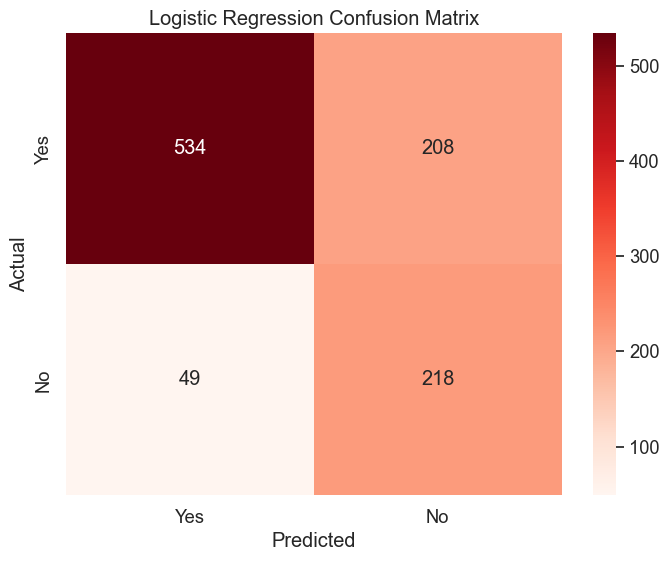

In [ ]:
confusion_matrix_data = confusion_matrix(y_eval,y_eval_pred)
# Labels for the matrix
labels = ['Yes', 'No']

# Create a confusion matrix plot
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_data, annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In summary:

- The model correctly predicted *538* instances of churn.
- The model correctly predicted *218* instances of no churn.
- The model incorrectly predicted *208* instances of churn when there was no churn.
- The model missed *49* instances of actual churn.


## 2. Random Forest Classifier
is a machine learning algorithm that builds multiple decision trees and combines their predictions to enhance accuracy and reduce overfitting

create the model

In [ ]:
#initialize the model
rfc = RandomForestClassifier()
rfc.__str__()

'RandomForestClassifier()'

Train the Model

In [ ]:
#using fit method to train
rfc.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier()

In [ ]:
# append the model on the model_trained list
models_trained.append(rfc)

Evaluate the model on evaluation set(eval)

In [ ]:
#predicting evaluation test y values using evaluation data
X_eval_array = X_eval.values #==convert dataframe to numpy array
y_eval_pred = rfc.predict(X_eval_array)

In [ ]:
#compute the metrics for classification report to check model accuracy
reportrfc = classification_report(y_eval, y_eval_pred, target_names=["Yes", "No"])

In [ ]:
print(reportrfc)

              precision    recall  f1-score   support

         Yes       0.86      0.84      0.85       742
          No       0.58      0.61      0.60       267

    accuracy                           0.78      1009
   macro avg       0.72      0.73      0.72      1009
weighted avg       0.79      0.78      0.78      1009



In [ ]:
confusion_rfc = confusion_matrix(y_eval,y_eval_pred)
confusion_rfc

array([[626, 116],
       [104, 163]], dtype=int64)

Lets plot the confusion matrix

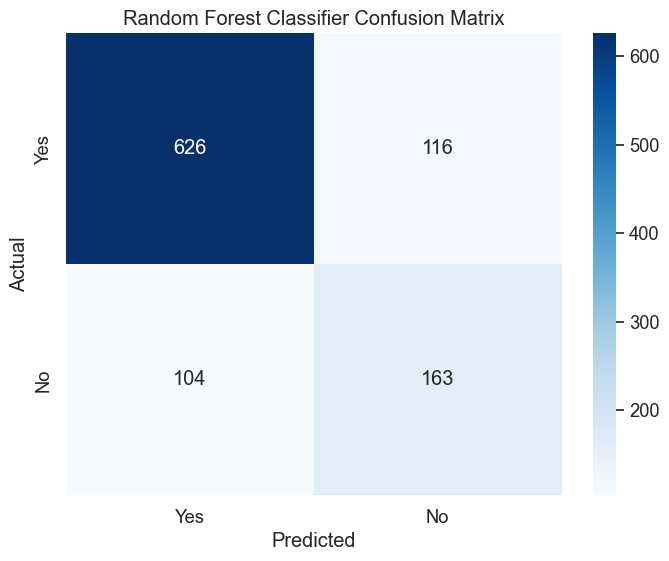

In [ ]:
confusion_rfc
# Labels for the matrix
labels = ['Yes', 'No']

# Create a confusion matrix plot
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_rfc, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()

In summary:

- The model correctly predicted *627* instances of churn.
- The model correctly predicted *160* instances of no churn.
- The model incorrectly predicted *115* instances of churn when there was no churn.
- The model missed *107* instances of actual churn.

## 3. Support Vector Machines (SVM)
 SVM is a machine learning algorithm used for classification and regression tasks. It finds an optimal hyperplane to separate data points of different classes. This hyperplane provides a decision boundary that can be used to classify new, unseen data points.

Create the Model

In [ ]:
#initialize the model
svc = SVC()
svc.__str__()

'SVC()'

Train the Model

In [ ]:
#using fit method to train
svc.fit(X_train_balanced, y_train_balanced)

SVC()

In [ ]:
# append the model on the model_trained list
models_trained.append(svc)

Evaluate the Model on evaluation set(eval)

In [ ]:
#predicting evaluation test y values using evaluation data
X_eval_array = X_eval.values #==convert dataframe to numpy array
y_eval_pred = svc.predict(X_eval_array)

In [ ]:
#compute the metrics for classification report to check model accuracy
reportsvc = classification_report(y_eval, y_eval_pred, target_names=["Yes", "No"])

In [ ]:
print(reportsvc)

              precision    recall  f1-score   support

         Yes       0.89      0.76      0.82       742
          No       0.53      0.74      0.61       267

    accuracy                           0.75      1009
   macro avg       0.71      0.75      0.72      1009
weighted avg       0.79      0.75      0.77      1009



In [ ]:
confusion_svc = confusion_matrix(y_eval,y_eval_pred)
confusion_svc

array([[563, 179],
       [ 69, 198]], dtype=int64)

Lets now visualize the confusion Matrix

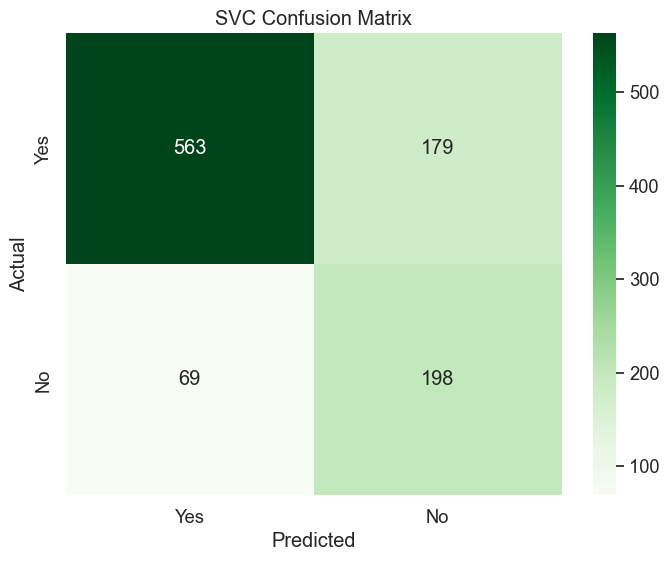

In [ ]:
confusion_svc

# Labels for the matrix
labels = ['Yes', 'No']

# Create a confusion matrix plot
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_svc, annot=True, fmt="d", cmap="Greens", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVC Confusion Matrix')
plt.show()

In summary:

- The model correctly predicted *563* instances of churn.
- The model correctly predicted *198* instances of no churn.
- The model incorrectly predicted *179* instances of churn when there was no churn.
- The model missed *69* instances of actual churn.

## 4. The KNeighborsClassifier
KNN: is a lazy-learning algorithm, predicts the class of a new data point based on the classes of its k nearest neighbors in the training data.

Create the Model

In [ ]:
#initialize the model
knn = KNeighborsClassifier()
knn.__str__()

'KNeighborsClassifier()'

Train the Model

In [ ]:
#using fit method to train
knn.fit(X_train_balanced, y_train_balanced)

KNeighborsClassifier()

In [ ]:
# append the model on the model_trained list
models_trained.append(knn)

Evaluate the Model on the evaluation set(eval)

In [ ]:
#predicting evaluation test y values using evaluation data
X_eval_array = X_eval.values #==convert dataframe to numpy array
y_eval_pred = knn.predict(X_eval_array)

In [ ]:
#compute the metrics for classification report to check model accuracy
reportknn = classification_report(y_eval, y_eval_pred, target_names=["Yes", "No"])

In [ ]:
print(reportknn)

              precision    recall  f1-score   support

         Yes       0.87      0.67      0.76       742
          No       0.44      0.73      0.55       267

    accuracy                           0.69      1009
   macro avg       0.66      0.70      0.66      1009
weighted avg       0.76      0.69      0.70      1009



In [ ]:
confusion_knn = confusion_matrix(y_eval,y_eval_pred)
confusion_knn

array([[499, 243],
       [ 73, 194]], dtype=int64)

Lets now visualize the Confusion Matrix

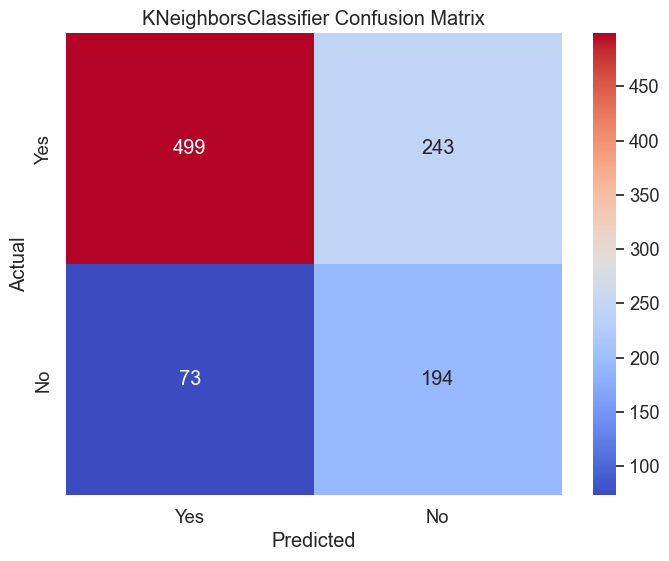

In [ ]:
confusion_knn

# Labels for the matrix
labels = ['Yes', 'No']

# Create a confusion matrix plot
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_knn, annot=True, fmt="d", cmap="coolwarm", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNeighborsClassifier Confusion Matrix')
plt.show()

In summary:

- The model correctly predicted *499* instances of churn.
- The model correctly predicted *194* instances of no churn.
- The model incorrectly predicted *243* instances of churn when there was no churn.
- The model missed *73* instances of actual churn.

## 5. Linear Discriminant Analysis (LDA)
LDA :A dimensionality reduction technique that aims to find the axes that maximize the separation between different classes.

Create Model

In [ ]:
#creating the model
lda = LinearDiscriminantAnalysis()
lda.__str__()

'LinearDiscriminantAnalysis()'

Train Model

In [ ]:
#using Fit method - 
lda.fit(X_train_balanced,y_train_balanced)

LinearDiscriminantAnalysis()

In [ ]:
# append the model on the model_trained list
models_trained.append(lda)

Evaluate the Model on the evaluation set(eval)

In [ ]:
#predicting evaluation test y values using evaluation data
X_eval_array = X_eval.values #==convert dataframe to numpy array
y_eval_pred = lda.predict(X_eval_array)

In [ ]:
#compute the metrics for classification report to check model accuracy
reportlda = classification_report(y_eval, y_eval_pred, target_names=["Yes", "No"])

In [ ]:
print(reportlda)

              precision    recall  f1-score   support

         Yes       0.91      0.72      0.80       742
          No       0.50      0.80      0.62       267

    accuracy                           0.74      1009
   macro avg       0.71      0.76      0.71      1009
weighted avg       0.80      0.74      0.75      1009



In [ ]:
confusion_lda = confusion_matrix(y_eval,y_eval_pred)
confusion_lda

array([[532, 210],
       [ 53, 214]], dtype=int64)

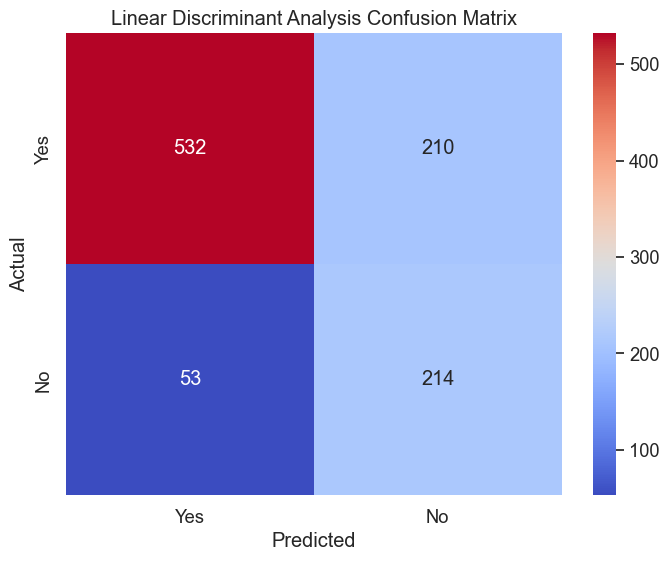

In [ ]:
confusion_lda

# Labels for the matrix
labels = ['Yes', 'No']

# Create a confusion matrix plot
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_lda, annot=True, fmt="d", cmap="coolwarm", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Linear Discriminant Analysis Confusion Matrix')
plt.show()

In summary:

- The model correctly predicted *532* instances of churn.
- The model correctly predicted *210* instances of no churn.
- The model incorrectly predicted *214* instances of churn when there was no churn.
- The model missed *53* instances of actual churn.

## 6. Quadratic Discriminant Analysis (QDA)
GDA : is a classification algorithm that extends Linear Discriminant Analysis (LDA) to accommodate cases where the covariance matrices of different classes are not equal.

create the model

In [ ]:
# Create an instance of QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.__str__()

'QuadraticDiscriminantAnalysis()'

Train the model

In [ ]:
qda.fit(X_train_balanced,y_train_balanced)

QuadraticDiscriminantAnalysis()

In [ ]:
# append the model on the model_trained list
models_trained.append(qda)

Evaluate the model on Evaluation set (eval)

In [ ]:
#predicting evaluation test y values using evaluation data
X_eval_array = X_eval.values #==convert dataframe to numpy array
y_eval_pred = qda.predict(X_eval_array)

In [ ]:
#compute the metrics for classification report to check model accuracy
reportqda = classification_report(y_eval, y_eval_pred, target_names=["Yes", "No"])

In [ ]:
print(reportqda)

              precision    recall  f1-score   support

         Yes       0.75      0.97      0.85       742
          No       0.57      0.11      0.18       267

    accuracy                           0.74      1009
   macro avg       0.66      0.54      0.51      1009
weighted avg       0.70      0.74      0.67      1009



In [ ]:
confusion_qda = confusion_matrix(y_eval,y_eval_pred)
confusion_qda

array([[720,  22],
       [238,  29]], dtype=int64)

lets now vizualize the confusion matrix

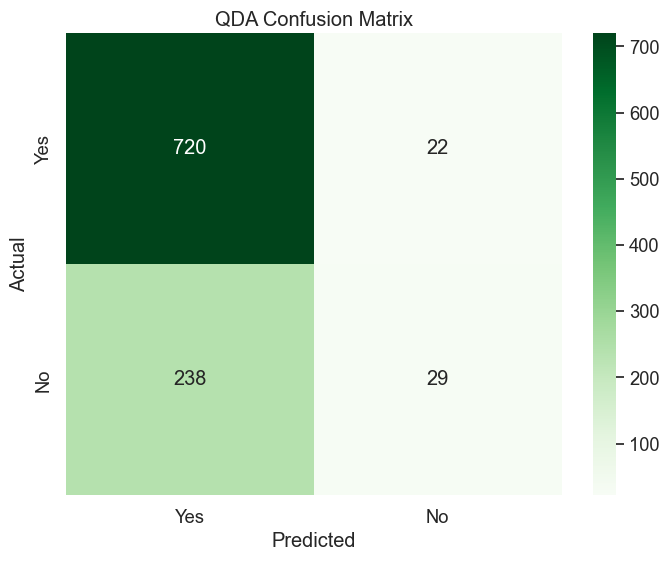

In [ ]:
confusion_qda

# Labels for the matrix
labels = ['Yes', 'No']

# Create a confusion matrix plot
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_qda, annot=True, fmt="d", cmap="Greens", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('QDA Confusion Matrix')
plt.show()

In summary:

- The model correctly predicted *720* instances of churn.
- The model correctly predicted *29* instances of no churn.
- The model incorrectly predicted *22* instances of churn when there was no churn.
- The model missed *238* instances of actual churn.

## 3.5 Model Comparison
here we are going to use Pandas DataFrame to compare models. The sample frame is as follows
| Model Name                   | Metric(metric name)| Details   |
|------------------------------| --------           |---------- |
| Logistic Regression          | F1 Score           | 0.651026  |
| Linear Discriminant Analysis | F1 Score           | 0.644970  |
|SVC                           | F1 Score           | 0.642633  |
|Random Forest Classifier      | F1 Score           | 0.628466  |
|KNeighbors Classifier         | F1 Score           | 0.588563  |
|Quadratic Discriminant Analysis | F1 Score           | 0.438134  |



we are going to use FI score metric to compare the models.

**F1 Score** assess the overall performance of a classification model. It considers both precision (the ratio of correctly predicted positive instances to the total predicted positives) and recall (the ratio of correctly predicted positive instances to the total actual positives). 
The F1 score is the harmonic mean of precision and recall, providing a balanced measure that considers false positives and false negatives. 
It ranges between 0 and 1, where higher values indicate better model performance. F1 score is particularly useful when dealing with imbalanced datasets where one class is more prevalent than the other.







In [ ]:
#define the metric to be used and the y pred.
metric = f1_score
y_pred =y_eval_pred

In [ ]:
#Create the lits that will hold the dictionary
X_eval_array = X_eval.values #== create a numpy Array for the sensitive models to dataframe format

info = [
    {
        "Model_Name": model.__str__(),
        f"Metric Name ({metric.__name__})": metric(
            y_true=y_eval,
            y_pred = model.predict(X_eval_array),
            pos_label='Yes'
        ),
    }
    for model in models_trained
]

In [ ]:
# Print FIscore for the models
info

[{'Model_Name': 'LogisticRegression()',
  'Metric Name (f1_score)': 0.6291486291486291},
 {'Model_Name': 'RandomForestClassifier()',
  'Metric Name (f1_score)': 0.5970695970695971},
 {'Model_Name': 'SVC()', 'Metric Name (f1_score)': 0.6149068322981367},
 {'Model_Name': 'KNeighborsClassifier()',
  'Metric Name (f1_score)': 0.5511363636363635},
 {'Model_Name': 'LinearDiscriminantAnalysis()',
  'Metric Name (f1_score)': 0.6193921852387844},
 {'Model_Name': 'QuadraticDiscriminantAnalysis()',
  'Metric Name (f1_score)': 0.18238993710691823}]

In [ ]:
#Generate the DataFrame that contain the F1 scores and respective model name
pd.DataFrame(info).sort_values(ascending=False, by= f"Metric Name ({metric.__name__})")

,Model_Name,Metric Name (f1_score)
0,LogisticRegression(),0.629149
4,LinearDiscriminantAnalysis(),0.619392
2,SVC(),0.614907
1,RandomForestClassifier(),0.597070
3,KNeighborsClassifier(),0.551136
5,QuadraticDiscriminantAnalysis(),0.182390


We can compare the models using the accuracy metric since the data is balanced and see if there is a difference.
**ACCURACY** can be a more appropriate metric for comparing models, as there's no significant class imbalance that could bias the evaluation. 

In [ ]:
#define the metric to be used and the y pred.
X_eval_array
y_pred =y_eval_pred

# Define a function to calculate accuracy
def calculate_accuracy(y_eval, y_pred):
    return accuracy_score(y_eval, y_pred)

In [ ]:
def compare_models(models, X_eval_list, y_eval):
    model_scores = {}
    
    for model_idx, model in enumerate(models):
        # Assuming each model in the list has a predict method
        y_pred = model.predict(X_eval_list[model_idx])
        
        accuracy = accuracy_score(y_eval, y_pred)  # Corrected y_eval to y_eval_true
        model_name = model.__class__.__name__  # Get the class name of the model  # Create a model name based on index
        model_scores[model_name] = accuracy
    
    return model_scores  # Don't forget to return the dictionary

# Assuming models_trained contains your trained models and X_eval_array, y_eval_true are evaluation data
# Create a list of X_eval_array for each model
X_eval_list = [X_eval_array for _ in models_trained]

# Calculate accuracy and create a dictionary of model scores
scores = compare_models(models_trained, X_eval_list, y_eval)
print("Model Comparison based on Accuracy:")
for model, accuracy in scores.items():
    print(f"Model: {model}, Accuracy = {accuracy:.4f}")

Model Comparison based on Accuracy:
Model: LogisticRegression, Accuracy = 0.7453
Model: RandomForestClassifier, Accuracy = 0.7820
Model: SVC, Accuracy = 0.7542
Model: KNeighborsClassifier, Accuracy = 0.6868
Model: LinearDiscriminantAnalysis, Accuracy = 0.7393
Model: QuadraticDiscriminantAnalysis, Accuracy = 0.7423


In [ ]:
# Create a DataFrame from the list of dictionaries and sort it in ascending order by 'Accuracy'
df = pd.DataFrame(data=[{'Model': model_name, 'Accuracy': accuracy} for model_name, accuracy in scores.items()])
df_sorted = df.sort_values(by='Accuracy', ascending=False)
df_sorted

,Model,Accuracy
1,RandomForestClassifier,0.781962
2,SVC,0.754212
0,LogisticRegression,0.745292
5,QuadraticDiscriminantAnalysis,0.742319
4,LinearDiscriminantAnalysis,0.739346
3,KNeighborsClassifier,0.686819


Based on F1 scores comparison, **Logistic Regression model** has highest score which shows that it performs better when it comes to true predictions compared to the rest of the model.

Based on Accuracy metric **Random Forest Classifier model** has the highest accuracy score of **78.19%** showing it performs better when it comes true predictions compared to rest of the models

Lets do further model tuning- **HYPERPARAMETER TUNING** to be able to select the best model therein.

## 3.6 Advance Model Hyperparameter Tuning
 Here are going to  optimize the performance of the models selected before. Hyperparameters are parameters that are set before training the model and cannot be learned directly from the data. Tuning these hyperparameters will significantly impact our models' performance, making it important to search for the best combination.

 We are going to use **GridSearchCV (Cross-Validated Grid Search)** to systematically search through a predefined set of hyperparameter values to find the combination that results in the best model performance according to a specified evaluation metric.


In [ ]:
#displaying the parameters of the models by using the first model our model_trained list
print(models_trained[0].get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [ ]:
#Initialize an empty model trained list.
best_models_trained = []

Create a label encoder since we are likely going to encounter errors since our Y-values is Yes and NO entries therefore our Y value should be encoded. 

In [ ]:
#initialize a label encoder
le = LabelEncoder().fit(y_train_balanced)

###  HP Tuning - Logistic Regression Model

In [ ]:
#get the hp-parameters for the first model in the list
models_trained[0].get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Define the parameter grid
parameters = {
   'C': [ 0.1 , 0.5 , 5, 7, 10],
   'max_iter': [200, 300, 500],
   'penalty': ['l2' ,  'l1'],
   'class_weight': 'Balanced',
   'class_weight': [None, 'balanced', {0: 1.0, 1: 2.0, 2: 0.5}]

   }

In [ ]:

# Create GridSearchCV instance
searcher = GridSearchCV(models_trained[0],
                        param_grid = parameters,
                        scoring = ['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall'],
                        refit = 'balanced_accuracy',
                        cv= 5,
                        verbose = 3)

In [ ]:
#lets encode the y_train_balanced
y_train_encoded = le.fit_transform(y_train_balanced)

In [ ]:
#fitting the train data with the gridsearchCV
searcher.fit(X_train_balanced, y_train_encoded)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END C=0.1, class_weight=None, max_iter=200, penalty=l2; accuracy: (test=0.757) balanced_accuracy: (test=0.757) f1: (test=0.764) precision: (test=0.744) recall: (test=0.784) total time=   0.0s
[CV 2/5] END C=0.1, class_weight=None, max_iter=200, penalty=l2; accuracy: (test=0.772) balanced_accuracy: (test=0.772) f1: (test=0.779) precision: (test=0.754) recall: (test=0.806) total time=   0.0s
[CV 3/5] END C=0.1, class_weight=None, max_iter=200, penalty=l2; accuracy: (test=0.793) balanced_accuracy: (test=0.793) f1: (test=0.803) precision: (test=0.767) recall: (test=0.843) total time=   0.0s
[CV 4/5] END C=0.1, class_weight=None, max_iter=200, penalty=l2; accuracy: (test=0.804) balanced_accuracy: (test=0.804) f1: (test=0.813) precision: (test=0.778) recall: (test=0.852) total time=   0.0s
[CV 5/5] END C=0.1, class_weight=None, max_iter=200, penalty=l2; accuracy: (test=0.786) balanced_accuracy: (test=0.786) f1: (test=0.79

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 5, 7, 10],
                         'class_weight': [None, 'balanced',
                                          {0: 1.0, 1: 2.0, 2: 0.5}],
                         'max_iter': [200, 300, 500], 'penalty': ['l2', 'l1']},
             refit='balanced_accuracy',
             scoring=['accuracy', 'balanced_accuracy', 'f1', 'precision',
                      'recall'],
             verbose=3)

In [ ]:
#the best parameters combination
searcher.best_params_


{'C': 0.5, 'class_weight': None, 'max_iter': 200, 'penalty': 'l2'}

In [ ]:
#Rename the best estimator per model intials
lr = searcher.best_estimator_
lr

LogisticRegression(C=0.5, max_iter=200)

In [ ]:
#append the tuned model params to the best_models_trained list
best_models_trained.append(lr)

In [ ]:
lr_score = searcher.best_score_
print("Best Logistic Regression Score is:", lr_score)

Best Logistic Regression Score is: 0.7858347386172008


The model improved from 74.52% to 78.58% through hyperparameter tuning.

### HP Tuning - Random Forest Classifier Model

In [ ]:
#get the hp-parameters for the first model in the list
models_trained[1].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Define the Parameter
parameters = {
    'n_estimators': [50, 100],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [ ]:
# Create GridSearchCV instance
searcher = GridSearchCV(models_trained[1],
                        param_grid = parameters,
                        scoring = ['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall'],
                        refit = 'balanced_accuracy',
                        cv= 5,
                        verbose = 3)

In [ ]:
#fitting the train data with the gridsearchCV
searcher.fit(X_train_balanced, y_train_encoded)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; accuracy: (test=0.766) balanced_accuracy: (test=0.766) f1: (test=0.739) precision: (test=0.834) recall: (test=0.663) total time=   0.9s
[CV 2/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; accuracy: (test=0.804) balanced_accuracy: (test=0.804) f1: (test=0.793) precision: (test=0.843) recall: (test=0.749) total time=   0.9s
[CV 3/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; accuracy: (test=0.911) balanced_accuracy: (test=0.911) f1: (test=0.916) precision: (test=0.861) recall: (test=0.980) total time=   0.8s
[CV 4/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; accuracy: (test=0.906) balanced_accuracy: (test=0.906) f1: (test=0.911) precision: (test=0.858) recall: (test=0.971) t

[CV 1/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; accuracy: (test=0.766) balanced_accuracy: (test=0.766) f1: (test=0.739) precision: (test=0.836) recall: (test=0.663) total time=   1.9s
[CV 2/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; accuracy: (test=0.804) balanced_accuracy: (test=0.804) f1: (test=0.796) precision: (test=0.828) recall: (test=0.766) total time=   2.2s
[CV 3/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; accuracy: (test=0.903) balanced_accuracy: (test=0.903) f1: (test=0.908) precision: (test=0.861) recall: (test=0.961) total time=   1.6s
[CV 4/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; accuracy: (test=0.900) balanced_accuracy: (test=0.900) f1: (test=0.906) precision: (test=0.854) recall: (test=0.965) total time=   1.4s
[CV 5/5] END bootstrap=True, max_depth=N

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [None, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             refit='balanced_accuracy',
             scoring=['accuracy', 'balanced_accuracy', 'f1', 'precision',
                      'recall'],
             verbose=3)

In [ ]:
#the best parameters combination
searcher.best_params_


{'bootstrap': False,
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [ ]:
#Rename the best estimator per model intials
rfc = searcher.best_estimator_
rfc

RandomForestClassifier(bootstrap=False, min_samples_split=5)

In [ ]:
#append the tuned model params to the best_models_trained list
best_models_trained.append(rfc)

In [ ]:
rfc_score = searcher.best_score_
print("Best Random Forest Classifier Score is:", rfc_score)

Best Random Forest Classifier Score is: 0.8617200674536256


The model improved from 78.19% to 86.17% through hyperparameter tuning. 

### HP Tuning - Support Vector Machine Model

In [ ]:
#get the hp-parameters for the first model in the list
models_trained[2].get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
#Define the Parameters for svc
parameters = {
'C': [0.1, 1],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [ ]:
# Create GridSearchCV instance
searcher = GridSearchCV(models_trained[2],
                        param_grid = parameters,
                        scoring = ['accuracy', 'balanced_accuracy', 'f1'],
                        refit = 'balanced_accuracy',
                        cv= 5,
                        verbose = 3)

In [ ]:
#fitting the train data with the gridsearchCV
searcher.fit(X_train_balanced, y_train_encoded)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END C=0.1, gamma=scale, kernel=linear; accuracy: (test=0.751) balanced_accuracy: (test=0.751) f1: (test=0.762) total time=   2.1s


[CV 2/5] END C=0.1, gamma=scale, kernel=linear; accuracy: (test=0.761) balanced_accuracy: (test=0.761) f1: (test=0.776) total time=   1.8s
[CV 3/5] END C=0.1, gamma=scale, kernel=linear; accuracy: (test=0.754) balanced_accuracy: (test=0.754) f1: (test=0.774) total time=   1.5s
[CV 4/5] END C=0.1, gamma=scale, kernel=linear; accuracy: (test=0.798) balanced_accuracy: (test=0.798) f1: (test=0.813) total time=   1.4s
[CV 5/5] END C=0.1, gamma=scale, kernel=linear; accuracy: (test=0.755) balanced_accuracy: (test=0.755) f1: (test=0.774) total time=   1.5s
[CV 1/5] END C=0.1, gamma=scale, kernel=rbf; accuracy: (test=0.755) balanced_accuracy: (test=0.755) f1: (test=0.761) total time=   2.3s
[CV 2/5] END C=0.1, gamma=scale, kernel=rbf; accuracy: (test=0.774) balanced_accuracy: (test=0.774) f1: (test=0.782) total time=   2.1s
[CV 3/5] END C=0.1, gamma=scale, kernel=rbf; accuracy: (test=0.784) balanced_accuracy: (test=0.784) f1: (test=0.795) total time=   2.3s
[CV 4/5] END C=0.1, gamma=scale, ker

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             refit='balanced_accuracy',
             scoring=['accuracy', 'balanced_accuracy', 'f1'], verbose=3)

In [ ]:
#the best parameters combination
searcher.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
#Rename the best estimator per model intials
svc = searcher.best_estimator_
svc

SVC(C=1)

In [ ]:
#append the tuned model params to the best_models_trained list
best_models_trained.append(svc)

In [ ]:
svc_score = searcher.best_score_
print("Best Support Vector Machine Score is:", svc_score)

Best Support Vector Machine Score is: 0.8141652613827993


The model improved from 75.42% to 81.42% through hyperparameter tuning.

### HP Tuning - K-neighbour Classifier Model

In [ ]:
#get the hp-parameters for the first model in the list
models_trained[3].get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
#Define the Parameters for knn
parameters = {
'n_neighbors': [3,5],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree'],
    'p': [1, 2],}

In [ ]:
# Create GridSearchCV instance
searcher = GridSearchCV(models_trained[3],
                        param_grid = parameters,
                        scoring = ['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall'],
                        refit = 'balanced_accuracy',
                        cv= 5,
                        verbose = 3)

In [ ]:
#fitting the train data with the gridsearchCV
searcher.fit(X_train_balanced, y_train_encoded)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END algorithm=auto, n_neighbors=3, p=1, weights=uniform; accuracy: (test=0.788) balanced_accuracy: (test=0.788) f1: (test=0.794) precision: (test=0.773) recall: (test=0.816) total time=   0.5s
[CV 2/5] END algorithm=auto, n_neighbors=3, p=1, weights=uniform; accuracy: (test=0.779) balanced_accuracy: (test=0.779) f1: (test=0.792) precision: (test=0.747) recall: (test=0.843) total time=   0.6s
[CV 3/5] END algorithm=auto, n_neighbors=3, p=1, weights=uniform; accuracy: (test=0.841) balanced_accuracy: (test=0.841) f1: (test=0.855) precision: (test=0.787) recall: (test=0.936) total time=   0.5s
[CV 4/5] END algorithm=auto, n_neighbors=3, p=1, weights=uniform; accuracy: (test=0.854) balanced_accuracy: (test=0.854) f1: (test=0.866) precision: (test=0.800) recall: (test=0.944) total time=   0.5s
[CV 5/5] END algorithm=auto, n_neighbors=3, p=1, weights=uniform; accuracy: (test=0.843) balanced_accuracy: (test=0.843) f1: (test=

[CV 1/5] END algorithm=auto, n_neighbors=3, p=2, weights=uniform; accuracy: (test=0.787) balanced_accuracy: (test=0.787) f1: (test=0.803) precision: (test=0.746) recall: (test=0.870) total time=   0.2s
[CV 2/5] END algorithm=auto, n_neighbors=3, p=2, weights=uniform; accuracy: (test=0.755) balanced_accuracy: (test=0.755) f1: (test=0.780) precision: (test=0.709) recall: (test=0.867) total time=   0.3s
[CV 3/5] END algorithm=auto, n_neighbors=3, p=2, weights=uniform; accuracy: (test=0.825) balanced_accuracy: (test=0.825) f1: (test=0.844) precision: (test=0.763) recall: (test=0.944) total time=   0.1s
[CV 4/5] END algorithm=auto, n_neighbors=3, p=2, weights=uniform; accuracy: (test=0.836) balanced_accuracy: (test=0.836) f1: (test=0.853) precision: (test=0.770) recall: (test=0.958) total time=   0.1s
[CV 5/5] END algorithm=auto, n_neighbors=3, p=2, weights=uniform; accuracy: (test=0.819) balanced_accuracy: (test=0.819) f1: (test=0.839) precision: (test=0.753) recall: (test=0.948) total tim

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree'],
                         'n_neighbors': [3, 5], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             refit='balanced_accuracy',
             scoring=['accuracy', 'balanced_accuracy', 'f1', 'precision',
                      'recall'],
             verbose=3)

In [ ]:
#the best parameters combination
searcher.best_params_

{'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

In [ ]:
#Rename the best estimator per model intials
knn = searcher.best_estimator_
knn

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

In [ ]:
#append the tuned model params to the best_models_trained list
best_models_trained.append(knn)

In [ ]:
knn_score = searcher.best_score_
print("Best K-neighbor Classifier Score is:", knn_score)

Best K-neighbor Classifier Score is: 0.8328836424957841


The model improved from 68.68% to 83.29% through hyperparameter tuning.

### HP Tuning - Linear Discriminant Analysis Model

In [ ]:
#get the hp-parameters for the first model in the list
models_trained[4].get_params()

{'covariance_estimator': None,
 'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [ ]:
#Define the Parameters for lda
parameters = {
     'solver': ['lsqr', 'eigen'],
    'shrinkage': ['auto', None],
    'tol': [0.0001, 0.001]
}

In [ ]:
# Create GridSearchCV instance
searcher = GridSearchCV(models_trained[4],
                        param_grid = parameters,
                        scoring = ['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall'],
                        refit = 'balanced_accuracy',
                        cv= 5,
                        verbose = 3)

In [ ]:
#fitting the train data with the gridsearchCV
searcher.fit(X_train_balanced, y_train_encoded)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END shrinkage=auto, solver=lsqr, tol=0.0001; accuracy: (test=0.755) balanced_accuracy: (test=0.755) f1: (test=0.763) precision: (test=0.739) recall: (test=0.789) total time=   0.1s
[CV 2/5] END shrinkage=auto, solver=lsqr, tol=0.0001; accuracy: (test=0.773) balanced_accuracy: (test=0.773) f1: (test=0.783) precision: (test=0.751) recall: (test=0.818) total time=   0.1s
[CV 3/5] END shrinkage=auto, solver=lsqr, tol=0.0001; accuracy: (test=0.790) balanced_accuracy: (test=0.790) f1: (test=0.800) precision: (test=0.764) recall: (test=0.840) total time=   0.0s
[CV 4/5] END shrinkage=auto, solver=lsqr, tol=0.0001; accuracy: (test=0.803) balanced_accuracy: (test=0.803) f1: (test=0.812) precision: (test=0.774) recall: (test=0.855) total time=   0.0s
[CV 5/5] END shrinkage=auto, solver=lsqr, tol=0.0001; accuracy: (test=0.777) balanced_accuracy: (test=0.777) f1: (test=0.787) precision: (test=0.753) recall: (test=0.825) total tim

[CV 1/5] END shrinkage=None, solver=lsqr, tol=0.001; accuracy: (test=0.757) balanced_accuracy: (test=0.757) f1: (test=0.765) precision: (test=0.741) recall: (test=0.791) total time=   0.0s
[CV 2/5] END shrinkage=None, solver=lsqr, tol=0.001; accuracy: (test=0.771) balanced_accuracy: (test=0.771) f1: (test=0.781) precision: (test=0.748) recall: (test=0.816) total time=   0.0s
[CV 3/5] END shrinkage=None, solver=lsqr, tol=0.001; accuracy: (test=0.792) balanced_accuracy: (test=0.792) f1: (test=0.802) precision: (test=0.765) recall: (test=0.841) total time=   0.0s
[CV 4/5] END shrinkage=None, solver=lsqr, tol=0.001; accuracy: (test=0.805) balanced_accuracy: (test=0.805) f1: (test=0.815) precision: (test=0.777) recall: (test=0.857) total time=   0.0s
[CV 5/5] END shrinkage=None, solver=lsqr, tol=0.001; accuracy: (test=0.778) balanced_accuracy: (test=0.778) f1: (test=0.788) precision: (test=0.755) recall: (test=0.825) total time=   0.0s
[CV 1/5] END shrinkage=None, solver=eigen, tol=0.0001; 

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(),
             param_grid={'shrinkage': ['auto', None],
                         'solver': ['lsqr', 'eigen'], 'tol': [0.0001, 0.001]},
             refit='balanced_accuracy',
             scoring=['accuracy', 'balanced_accuracy', 'f1', 'precision',
                      'recall'],
             verbose=3)

In [ ]:
#the best parameters combination
searcher.best_params_

{'shrinkage': None, 'solver': 'lsqr', 'tol': 0.0001}

In [ ]:
#Rename the best estimator per model intials
lda = searcher.best_estimator_
lda

LinearDiscriminantAnalysis(solver='lsqr')

In [ ]:
#append the tuned model params to the best_models_trained list
best_models_trained.append(lda)

In [ ]:
lda_score = searcher.best_score_
print("Best Linear Discriminant Analysis Score is:", lda_score)

Best Linear Discriminant Analysis Score is: 0.7806070826306915


The model improved from 73.93% to 78.06% through hyperparameter tuning.

### HP Tuning - Quadratic Discriminant Analysis

In [ ]:
#get the hp-parameters for the first model in the list
models_trained[4].get_params()

{'covariance_estimator': None,
 'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [ ]:
#Define the Parameters for Qda
parameters = {
    'reg_param': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'store_covariance': [True, False],
    'tol': [1e-4, 1e-3, 1e-2]
}

In [ ]:
# Create GridSearchCV instance
searcher = GridSearchCV(models_trained[5],
                        param_grid = parameters,
                        scoring = ['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall'],
                        refit = 'balanced_accuracy',
                        cv= 5,
                        verbose = 3)

In [ ]:
#fitting the train data with the gridsearchCV
searcher.fit(X_train_balanced, y_train_encoded)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END reg_param=0.0, store_covariance=True, tol=0.0001; accuracy: (test=0.532) balanced_accuracy: (test=0.532) f1: (test=0.155) precision: (test=0.797) recall: (test=0.086) total time=   0.0s
[CV 2/5] END reg_param=0.0, store_covariance=True, tol=0.0001; accuracy: (test=0.545) balanced_accuracy: (test=0.545) f1: (test=0.244) precision: (test=0.719) recall: (test=0.147) total time=   0.0s
[CV 3/5] END reg_param=0.0, store_covariance=True, tol=0.0001; accuracy: (test=0.537) balanced_accuracy: (test=0.537) f1: (test=0.164) precision: (test=0.844) recall: (test=0.091) total time=   0.0s
[CV 4/5] END reg_param=0.0, store_covariance=True, tol=0.0001; accuracy: (test=0.587) balanced_accuracy: (test=0.587) f1: (test=0.545) precision: (test=0.607) recall: (test=0.494) total time=   0.0s
[CV 5/5] END reg_param=0.0, store_covariance=True, tol=0.0001; accuracy: (test=0.593) balanced_accuracy: (test=0.593) f1: (test=0.436) precisi

[CV 5/5] END reg_param=0.1, store_covariance=False, tol=0.001; accuracy: (test=0.782) balanced_accuracy: (test=0.782) f1: (test=0.800) precision: (test=0.739) recall: (test=0.872) total time=   0.0s
[CV 1/5] END reg_param=0.1, store_covariance=False, tol=0.01; accuracy: (test=0.748) balanced_accuracy: (test=0.748) f1: (test=0.760) precision: (test=0.725) recall: (test=0.798) total time=   0.0s
[CV 2/5] END reg_param=0.1, store_covariance=False, tol=0.01; accuracy: (test=0.766) balanced_accuracy: (test=0.766) f1: (test=0.781) precision: (test=0.735) recall: (test=0.833) total time=   0.0s
[CV 3/5] END reg_param=0.1, store_covariance=False, tol=0.01; accuracy: (test=0.790) balanced_accuracy: (test=0.790) f1: (test=0.806) precision: (test=0.749) recall: (test=0.874) total time=   0.0s
[CV 4/5] END reg_param=0.1, store_covariance=False, tol=0.01; accuracy: (test=0.795) balanced_accuracy: (test=0.795) f1: (test=0.812) precision: (test=0.751) recall: (test=0.884) total time=   0.0s
[CV 5/5] 

GridSearchCV(cv=5, estimator=QuadraticDiscriminantAnalysis(),
             param_grid={'reg_param': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'store_covariance': [True, False],
                         'tol': [0.0001, 0.001, 0.01]},
             refit='balanced_accuracy',
             scoring=['accuracy', 'balanced_accuracy', 'f1', 'precision',
                      'recall'],
             verbose=3)

In [ ]:
#the best parameters combination
searcher.best_params_


{'reg_param': 0.2, 'store_covariance': True, 'tol': 0.0001}

In [ ]:
#Rename the best estimator per model intials
qda = searcher.best_estimator_
qda

QuadraticDiscriminantAnalysis(reg_param=0.2, store_covariance=True)

In [ ]:
#append the tuned model params to the best_models_trained list
best_models_trained.append(qda)

In [ ]:
qda_score = searcher.best_score_
print("Best Linear Discriminant Analysis Score is:", qda_score)

Best Linear Discriminant Analysis Score is: 0.7774030354131535


The model improved from 74.23% to 77.74% through hyperparameter tuning.

### HP- Tuned Model Comparison
Here we are going to compare the hypertuned models using the Accuracy score/F1 Score 

Lets compare the models using accuracy score - **best_score**

In [ ]:
# Create a list of best scores
best_scores = []

# Append individual model scores
best_scores.append(lr_score)
best_scores.append(rfc_score)
best_scores.append(svc_score)
best_scores.append(knn_score)
best_scores.append(lda_score)
best_scores.append(qda_score)
 
#Print the list of best scores
print(best_scores)

[0.7858347386172008, 0.8617200674536256, 0.8141652613827993, 0.8328836424957841, 0.7806070826306915, 0.7774030354131535]


In [ ]:
#combine the two lists with zip method and convert
best_models_trained
best_scores
combined_list = list(zip(best_models_trained,best_scores))

#Create dataframe
df =pd.DataFrame(combined_list,columns= ('Model Name', 'Best Score'))

# Sort the DataFrame by the 'Best Score' column in ascending order
df_sorted = df.sort_values(by='Best Score', ascending=False)
df_sorted

,Model Name,Best Score
1,"(DecisionTreeClassifier(max_features='sqrt', m...",0.861720
3,"KNeighborsClassifier(n_neighbors=3, p=1, weigh...",0.832884
2,SVC(C=1),0.814165
0,"LogisticRegression(C=0.5, max_iter=200)",0.785835
4,LinearDiscriminantAnalysis(solver='lsqr'),0.780607
5,"QuadraticDiscriminantAnalysis(reg_param=0.2, s...",0.777403


From the Accuracy Score the **Random Forest Classifier** is the best model to use for our Prediction test. It has performed most out of the the 6 models trained with accuracy score of **86.17%**

## 3.7 Model Improvement

Here we are going to use RandomSearchCV  to to hypertune the parameters on Random Forest Classifier model.

It automates the process of searching for the best combination of hyperparameters to optimize  model performance resulting in a **more optimized and effective machine learning model for our task.**

In [ ]:
# Create a RandomForestClassifier instance
rfc = RandomForestClassifier()

# Define the hyperparameter grid for RandomizedSearchCV
parameter = {
    'n_estimators': randint(10, 200),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None] + list(range(5, 30)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=parameter,
    n_iter=100,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

In [ ]:
# Fit the RandomizedSearchCV instance on your data
random_search.fit(X_train_balanced, y_train_encoded)  # y_trained encoded where yes/no are replaced with binary


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14, 15, 16,
                                                      17, 18, 19, 20, 21, 22,
                                                      23, 24, 25, 26, 27, 28,
                                                      29],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001519EE612A0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001519EE60910>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001518A958D00>},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model
best_rfc = random_search.best_estimator_
best_rfc

Best Hyperparameters: {'bootstrap': False, 'max_depth': 28, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 57}


RandomForestClassifier(bootstrap=False, max_depth=28, max_features='auto',
                       min_samples_leaf=2, n_estimators=57)

In [ ]:
# Get the best score for RandomSearchCV tuning
best_rfc_score = random_search.best_score_
print("Best Random Forest Classifier Score after further improvement using RandomSearchCV is:", best_rfc_score)

Best Random Forest Classifier Score after further improvement using RandomSearchCV is: 0.8602023608768972


In [ ]:
#Get the best score for GridSearchCV tuning
rfc_score
print("Best Random Forest Classifier Score after improvement using GridSearchCV is:", rfc_score)

Best Random Forest Classifier Score after improvement using GridSearchCV is: 0.8617200674536256


You notice that there is a slight difference(downsizing of 0.13%) on Further Model Improvement using the RandomSearch CV to tune the hyperparameters.
- Tuning using GridSearchCV yielded accuracy score of **86.17%**
- Tuning using RandomSearchCV yielded accuracy score of **86.02%**

This could be due to the fact that they explore the hyperparameter space in different ways, which can lead to differences in their results, including the observed accuracy.


## 3.8 FUTURE PREDICTIONS

### 3.8.1 Preprocessing X-test data.
Earlier we during feature scaling/encoding and engineering we preprocessed the X-test set by adding a new feature _ **TotalAnnualCharges** and encoded the categorical columns by using **OneEnconder()** which learned from the train set and then fitted the learned model to the X-test.Encoding the categorical columns to convert them to numeric for the models to undertand the data.

Then using StandardScaler we scalled all columns.

For this step we are going to call in the X-test dataframe i.e = **final_X_test**

In [ ]:
#Call in the DataFrame where preprocessed X-test is stored
final_X_test.head()

,Tenure,MonthlyCharges,TotalCharges,ChargesperYear,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,CustomerID
0,-0.838926,0.643928,-0.547278,0.643928,-0.985237,0.985237,0.440332,-0.440332,0.975126,-0.975126,...,0.915329,-0.514338,-0.572236,-0.826586,0.826586,-0.535851,-0.525109,1.402309,-0.536771,7613-LLQFO
1,-0.961238,-1.486446,-0.934338,-1.486446,-0.985237,0.985237,0.440332,-0.440332,0.975126,-0.975126,...,0.915329,-0.514338,-0.572236,1.209796,-1.209796,-0.535851,-0.525109,-0.713110,1.862993,4568-TTZRT
2,-0.227364,0.552460,-0.038843,0.552460,-0.985237,0.985237,0.440332,-0.440332,0.975126,-0.975126,...,-1.092503,1.944247,-0.572236,1.209796,-1.209796,-0.535851,-0.525109,1.402309,-0.536771,9513-DXHDA
3,-0.227364,0.479285,-0.052954,0.479285,-0.985237,0.985237,0.440332,-0.440332,0.975126,-0.975126,...,0.915329,-0.514338,-0.572236,-0.826586,0.826586,-0.535851,-0.525109,1.402309,-0.536771,2640-PMGFL
4,-1.287404,0.800255,-0.975193,0.800255,-0.985237,0.985237,0.440332,-0.440332,-1.025509,1.025509,...,0.915329,-0.514338,-0.572236,1.209796,-1.209796,-0.535851,-0.525109,-0.713110,1.862993,3801-HMYNL


In [ ]:
final_X_test.columns

Index(['Tenure', 'MonthlyCharges', 'TotalCharges', 'ChargesperYear',
       'Gender_Female', 'Gender_Male', 'SeniorCitizen_No', 'SeniorCitizen_Yes',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Unknown',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Unknown', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Unknown',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Unknown',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Unknown',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service',
       'Stre

In [ ]:
#lets the drop customerID column for predictions match the the data used in the models
final_X_test_p = final_X_test.drop('CustomerID', axis = 1)
final_X_test_p

,Tenure,MonthlyCharges,TotalCharges,ChargesperYear,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.838926,0.643928,-0.547278,0.643928,-0.985237,0.985237,0.440332,-0.440332,0.975126,-0.975126,...,-0.804674,0.915329,-0.514338,-0.572236,-0.826586,0.826586,-0.535851,-0.525109,1.402309,-0.536771
1,-0.961238,-1.486446,-0.934338,-1.486446,-0.985237,0.985237,0.440332,-0.440332,0.975126,-0.975126,...,-0.804674,0.915329,-0.514338,-0.572236,1.209796,-1.209796,-0.535851,-0.525109,-0.713110,1.862993
2,-0.227364,0.552460,-0.038843,0.552460,-0.985237,0.985237,0.440332,-0.440332,0.975126,-0.975126,...,1.242739,-1.092503,1.944247,-0.572236,1.209796,-1.209796,-0.535851,-0.525109,1.402309,-0.536771
3,-0.227364,0.479285,-0.052954,0.479285,-0.985237,0.985237,0.440332,-0.440332,0.975126,-0.975126,...,-0.804674,0.915329,-0.514338,-0.572236,-0.826586,0.826586,-0.535851,-0.525109,1.402309,-0.536771
4,-1.287404,0.800255,-0.975193,0.800255,-0.985237,0.985237,0.440332,-0.440332,-1.025509,1.025509,...,1.242739,0.915329,-0.514338,-0.572236,1.209796,-1.209796,-0.535851,-0.525109,-0.713110,1.862993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.042779,0.332936,-0.770673,0.332936,1.014984,-1.014984,0.440332,-0.440332,0.975126,-0.975126,...,-0.804674,0.915329,-0.514338,-0.572236,-0.826586,0.826586,1.866190,-0.525109,-0.713110,-0.536771
1996,0.588051,0.298012,0.527249,0.298012,1.014984,-1.014984,0.440332,-0.440332,0.975126,-0.975126,...,1.242739,-1.092503,-0.514338,1.747529,1.209796,-1.209796,-0.535851,-0.525109,-0.713110,1.862993
1997,-1.246633,-0.678201,-0.973187,-0.678201,-0.985237,0.985237,-2.271015,2.271015,0.975126,-0.975126,...,-0.804674,0.915329,-0.514338,-0.572236,-0.826586,0.826586,-0.535851,-0.525109,1.402309,-0.536771
1998,1.199613,1.518695,2.095793,1.518695,-0.985237,0.985237,-2.271015,2.271015,0.975126,-0.975126,...,1.242739,-1.092503,1.944247,-0.572236,-0.826586,0.826586,1.866190,-0.525109,-0.713110,-0.536771


### 3.8.2 Perform Predictions


Here we are going to use the Model RFC Estimator where we  tuned hyperparameters using the GridSearch CV. Stored in the variable : **rfc** The best parameter combination was: **{'bootstrap': False, 'max_depth': 28, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 57}**

In [ ]:
#Predict the churn column using the RFC best estimator
# Predict Churn rate for the test dataset using the best_rfc model
y_test_pred = rfc.predict(final_X_test_p)

In [ ]:
# Create a new DataFrame to store the test dataset features and the predicted labels
final_X_test_with_pred = pd.DataFrame(final_X_test_p)
final_X_test_with_pred['Predicted_Churn'] = y_test_pred

final_X_test_with_pred

,Tenure,MonthlyCharges,TotalCharges,ChargesperYear,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Predicted_Churn
0,-0.838926,0.643928,-0.547278,0.643928,-0.985237,0.985237,0.440332,-0.440332,0.975126,-0.975126,...,0.915329,-0.514338,-0.572236,-0.826586,0.826586,-0.535851,-0.525109,1.402309,-0.536771,1
1,-0.961238,-1.486446,-0.934338,-1.486446,-0.985237,0.985237,0.440332,-0.440332,0.975126,-0.975126,...,0.915329,-0.514338,-0.572236,1.209796,-1.209796,-0.535851,-0.525109,-0.713110,1.862993,0
2,-0.227364,0.552460,-0.038843,0.552460,-0.985237,0.985237,0.440332,-0.440332,0.975126,-0.975126,...,-1.092503,1.944247,-0.572236,1.209796,-1.209796,-0.535851,-0.525109,1.402309,-0.536771,0
3,-0.227364,0.479285,-0.052954,0.479285,-0.985237,0.985237,0.440332,-0.440332,0.975126,-0.975126,...,0.915329,-0.514338,-0.572236,-0.826586,0.826586,-0.535851,-0.525109,1.402309,-0.536771,0
4,-1.287404,0.800255,-0.975193,0.800255,-0.985237,0.985237,0.440332,-0.440332,-1.025509,1.025509,...,0.915329,-0.514338,-0.572236,1.209796,-1.209796,-0.535851,-0.525109,-0.713110,1.862993,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.042779,0.332936,-0.770673,0.332936,1.014984,-1.014984,0.440332,-0.440332,0.975126,-0.975126,...,0.915329,-0.514338,-0.572236,-0.826586,0.826586,1.866190,-0.525109,-0.713110,-0.536771,1
1996,0.588051,0.298012,0.527249,0.298012,1.014984,-1.014984,0.440332,-0.440332,0.975126,-0.975126,...,-1.092503,-0.514338,1.747529,1.209796,-1.209796,-0.535851,-0.525109,-0.713110,1.862993,0
1997,-1.246633,-0.678201,-0.973187,-0.678201,-0.985237,0.985237,-2.271015,2.271015,0.975126,-0.975126,...,0.915329,-0.514338,-0.572236,-0.826586,0.826586,-0.535851,-0.525109,1.402309,-0.536771,1
1998,1.199613,1.518695,2.095793,1.518695,-0.985237,0.985237,-2.271015,2.271015,0.975126,-0.975126,...,-1.092503,1.944247,-0.572236,-0.826586,0.826586,1.866190,-0.525109,-0.713110,-0.536771,0


In [ ]:
# Calculate and display the counts of 'churn' and 'not churn' predictions
churn_counts = final_X_test_with_pred['Predicted_Churn'].value_counts()
print(churn_counts)

Predicted_Churn
0    1474
1     526
Name: count, dtype: int64


In [ ]:
# Calculate the percentages of 'churn' and 'not churn' predictions
churn_percentage = churn_counts / len(final_X_test_with_pred) * 100

# Display the counts and percentages
for label, count, percentage in zip(churn_counts.index, churn_counts, churn_percentage):
    print(f"{label}: Count={count}, Percentage={percentage:.2f}%")

0: Count=1474, Percentage=73.70%
1: Count=526, Percentage=26.30%


From the predictions it is evident that our model has high percentage of low customer churn rate for the Vodafone Compan, with a No churn rate of 73.70%. This could be due to Class Imbalances: the distribution of churned customers to non-churned customers in your dataset is highly imbalanced, the model might learn to predict the majority class more often. This can lead to high accuracy but poor performance in predicting the minority class (churned customers). 

This was noted earlier on one of our Smart Questions for the project. This implies that our Train_dataset was bias. Lets check feature importance of the dataset

## Feature Importance Analysis: 
Lets Analyze the importance of the features in our model. Some features might not be contributing effectively to distinguish between churn and non-churn cases. lets use feature importance techniques provided by our  model (RandomForest's feature importances) to identify which features are having the most impact on predictions.

In [ ]:
# Create and fit a RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_balanced, y_train_encoded)

# Get feature importances from the trained model
feature_importances = rfc.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train_balanced.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features and their importances
print(feature_importance_df)

                                    Feature  Importance
45                  Contract_Month-to-month    0.103528
0                                    Tenure    0.094603
2                              TotalCharges    0.088735
1                            MonthlyCharges    0.078925
3                            ChargesperYear    0.077135
21                        OnlineSecurity_No    0.046455
33                           TechSupport_No    0.041290
19              InternetService_Fiber optic    0.034104
52           PaymentMethod_Electronic check    0.033407
47                        Contract_Two year    0.029338
25                          OnlineBackup_No    0.021396
48                      PaperlessBilling_No    0.018703
29                      DeviceProtection_No    0.018346
49                     PaperlessBilling_Yes    0.017445
5                               Gender_Male    0.016170
4                             Gender_Female    0.016051
36                          TechSupport_Yes    0

From the Feature Importance Analysis our model showed that the following features ranked from the largest impact to churn rate:

Feature                     /Importance
- Contract_Month-to-month   / 0.103528
- Tenure    /0.094603
- TotalCharges    /0.088735
- MonthlyCharges    /0.078925
- ChargesperYear    /0.077135

## CONCLUSION
The combination of our EDA analysis and the model's predictions suggests that Vodafone current customer base is relatively stable and less prone to churn. However, it's essential to continue implementing customer-centric strategies to maintain this trend. By leveraging the understanding of customer behaviors, contract preferences, and the alignment between contract types and monthly charges, we can strategically optimize your efforts for customer retention.

Remember that predictive models provide insights based on historical data, and while they're valuable, they can't account for all external factors. Your team's ongoing dedication to providing exceptional service and proactive retention strategies will play a vital role in sustaining customer loyalty and achieving long-term success.

